In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler , Normalizer
from scipy import stats
from sklearn import metrics
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid")
from sklearn import datasets
from sklearn import tree
import plotly.graph_objects as ply
import plotly.express as px
from sklearn.datasets import load_digits
%config InlineBackend.figure_format = 'retina'

In [4]:
save_mode = False
save_path = "/Users/sdang/Documents/Bootcamp/SHAX_group_project/Data_Visuals/"

In [5]:
# Reading in csv file 
df = pd.read_csv("cardio.csv", ";")

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.shape

(70000, 13)

In [8]:
list(df)

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

## Data Pre-Processing

In [9]:
df.drop("id", axis=1,inplace=True)

In [10]:
# Checking for null values
display("NULL Values", df.isnull().sum())

'NULL Values'

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
# Checking for duplicates
df.duplicated().sum()

24

In [12]:
# Drop duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
# Turning "age" column units from days to years
df["age"] = df["age"].div(365).apply(lambda x: int(x))

In [14]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.767103,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.shape

(69976, 12)

In [16]:
# Renaming columns
df = df.rename(columns = {"gender":"sex", "ap_hi":"systolic blood pressure", "ap_lo":"diastolic blood pressure"})
df.head()

,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


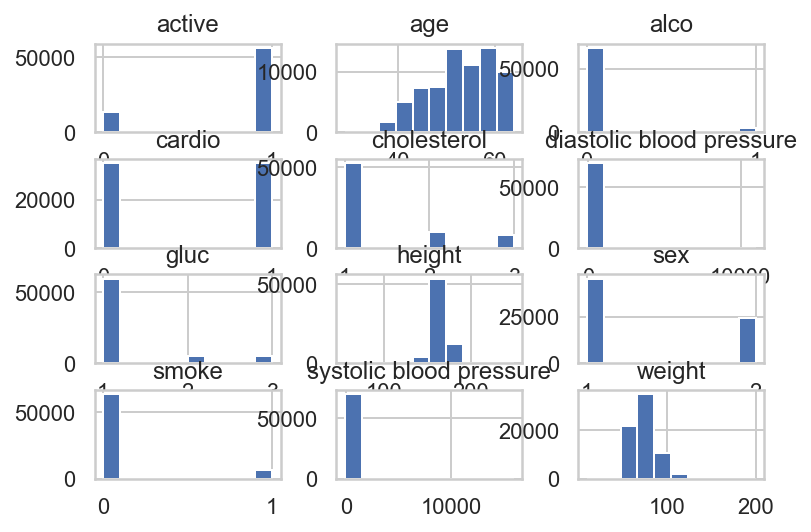

In [17]:
# Histogram to see if scaling is needed
df.hist()
if save_mode:
    plt.savefig(save_path + "His_features.png")

# Feature Selection

In [18]:
df.corr()

,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022863,-0.081538,0.053576,0.020855,0.017619,0.154023,0.098391,-0.047664,-0.029767,-0.009994,0.238020
sex,-0.022863,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.081538,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,0.188003,0.094425,-0.006569,-0.010871
weight,0.053576,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599
systolic blood pressure,0.020855,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475
diastolic blood pressure,0.017619,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154023,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
gluc,0.098391,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047664,0.338131,0.188003,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alco,-0.029767,0.170950,0.094425,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


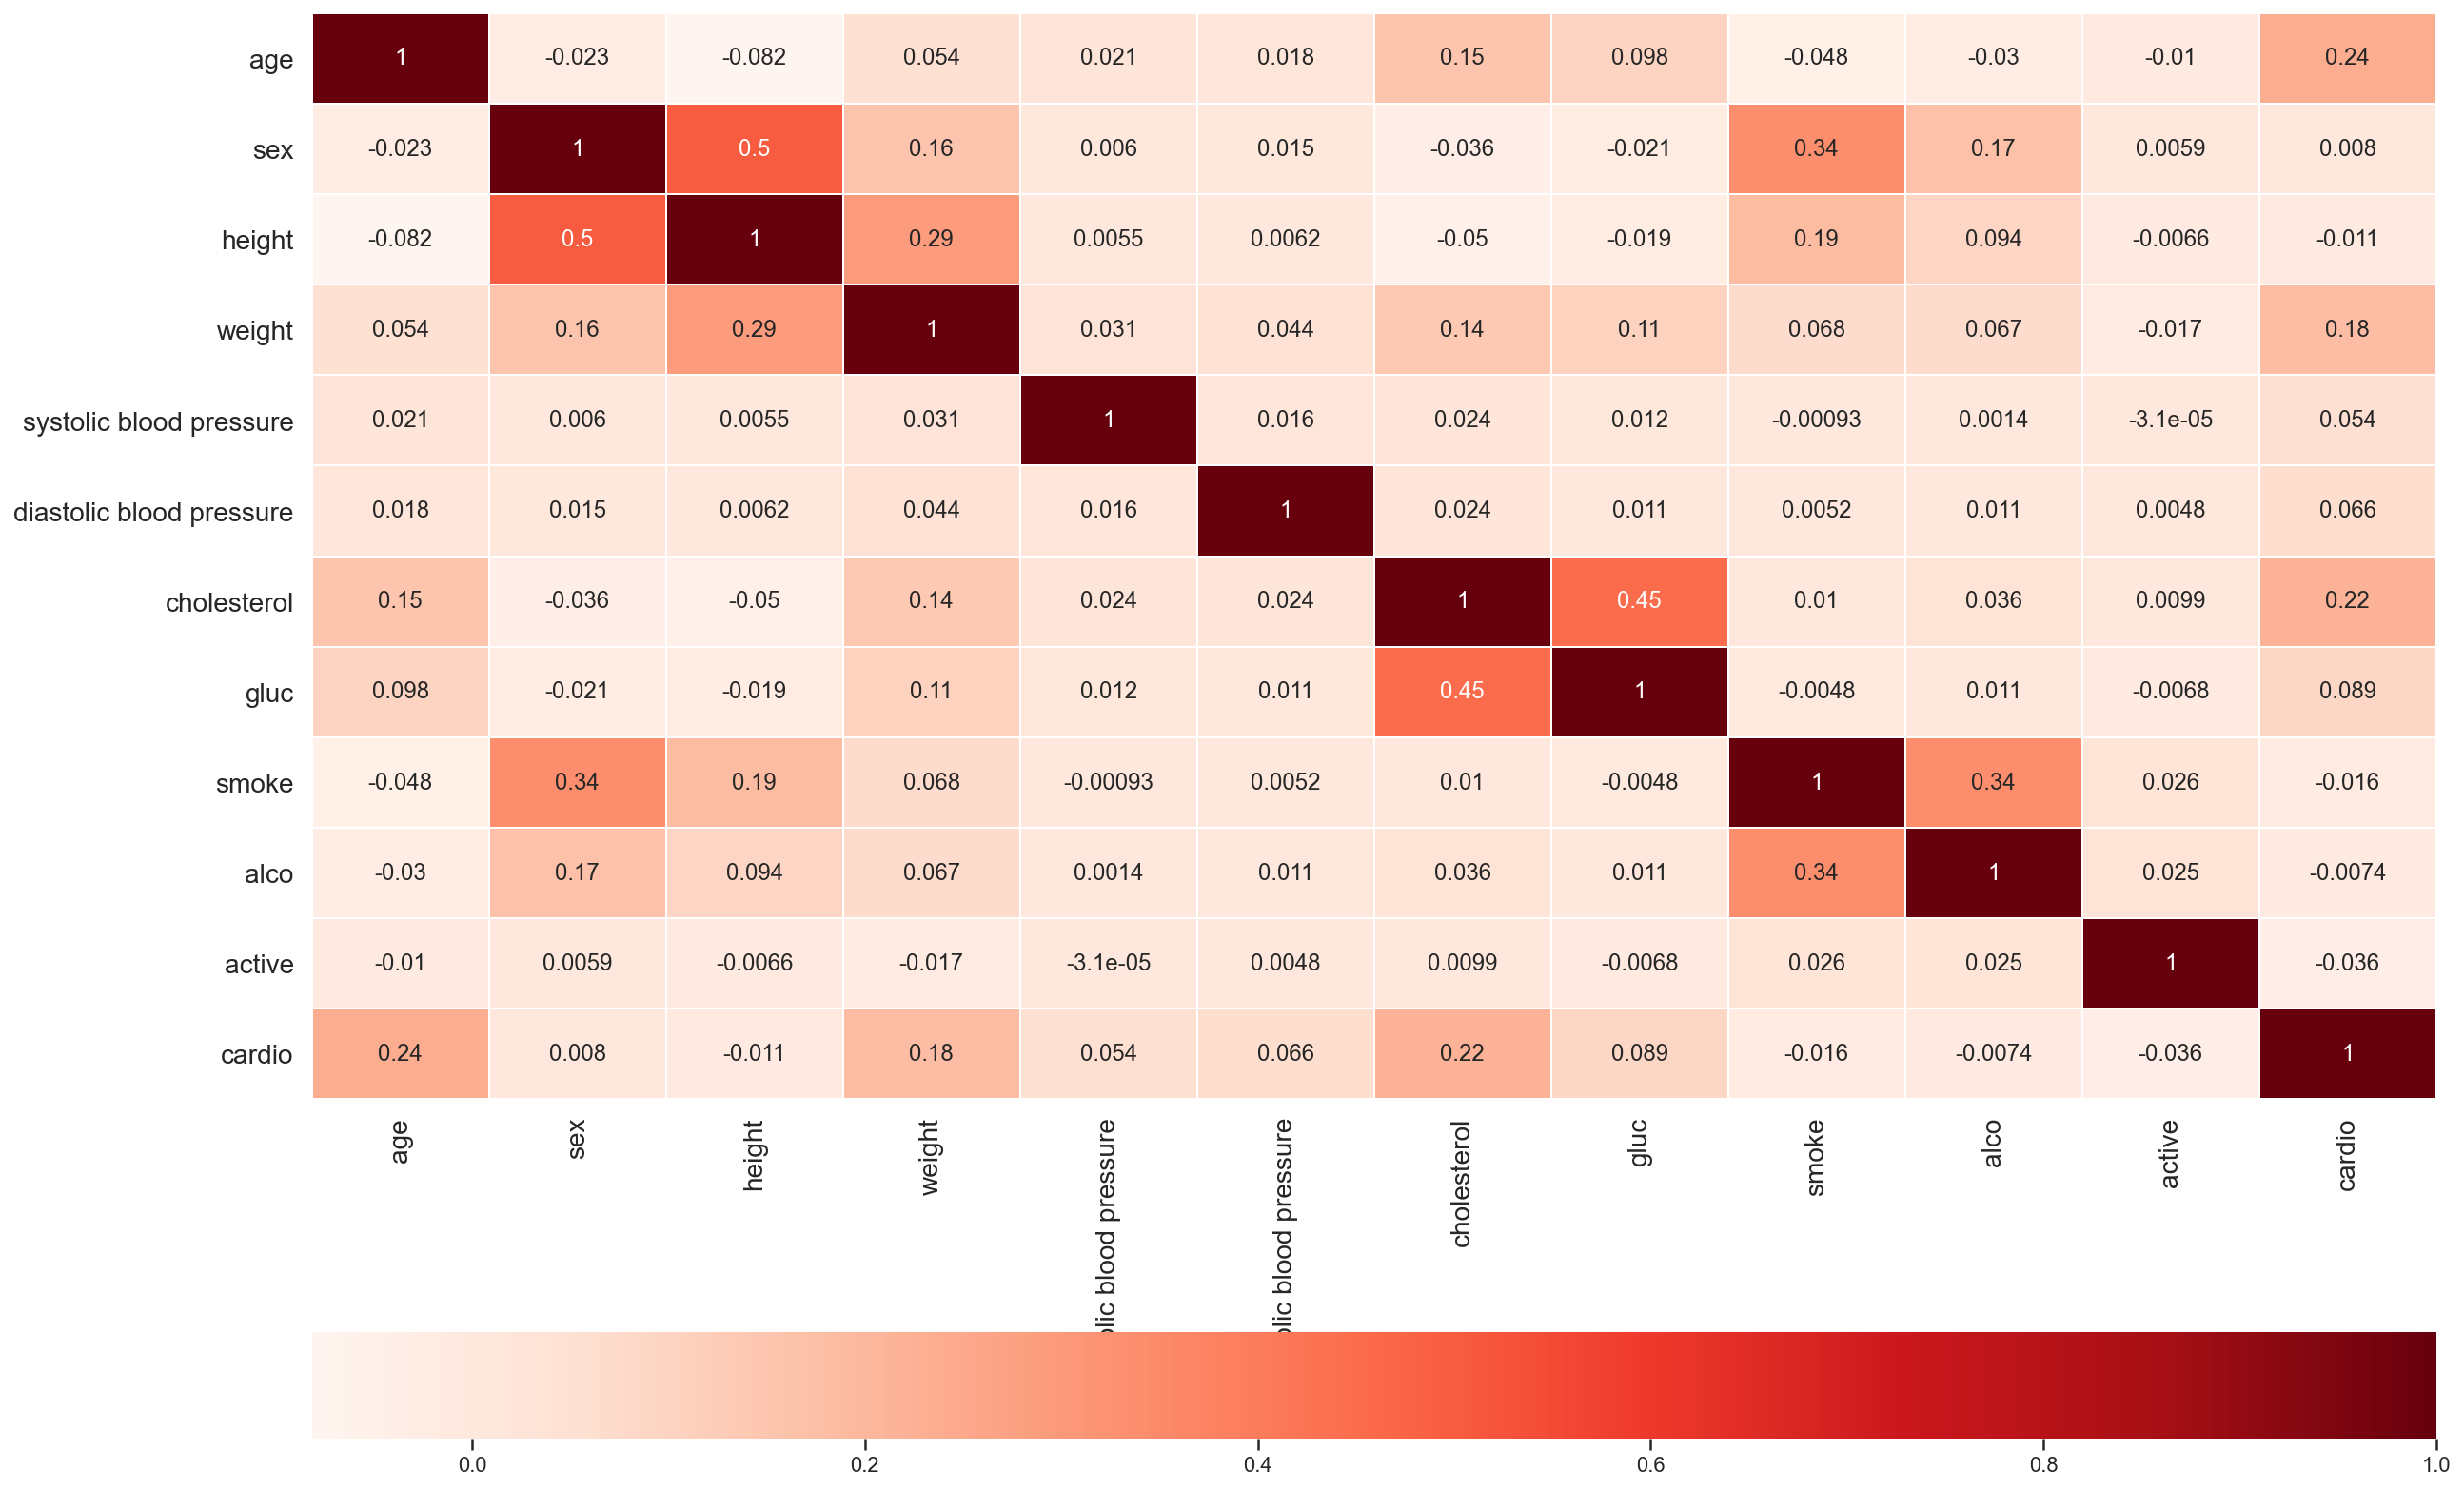

In [19]:
mpl.rcParams["figure.figsize"] = 20, 15
res = sns.heatmap(df.corr(), annot = True, linewidth=.5, cmap="Reds",annot_kws={"size":12}, cbar_kws={"orientation": "horizontal"})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
if save_mode:
    plt.savefig(save_path + "Corr_Matrix_Heat_Map.png")

## Feature Engineering

In [20]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [21]:
from sklearn.feature_selection import RFE

In [22]:
y = df[["cardio"]]
X = df.drop(["cardio"],axis=1)

In [23]:
X

,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [24]:
# Create the RFE 
rf = RandomForestClassifier()

In [25]:
rf

RandomForestClassifier()

In [26]:
rfe = RFE(estimator=rf,step=1)
selector = rfe.fit(X, y)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/feature_selection/_rfe.py:196: DataConver

In [27]:
selector.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [28]:
selector.ranking_

array([1, 4, 1, 1, 1, 1, 2, 3, 6, 7, 5])

In [29]:
# from sklearn.model_selection import StratifiedKFold
# from yellowbrick.model_selection import RFECV
# cv = StratifiedKFold(5)
# visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='accuracy')

# visualizer.fit(X, y)        # Fit the data to the visualizer
# visualizer.show()     

## Selected Features: age, height, weight, systolic blood pressure, diastolic blood pressure, cholesterol

In [30]:
print("Optimal number of features : %d" % rfe.n_features_)

Optimal number of features : 5


In [31]:
df = df.drop(['sex','gluc','smoke','alco','active'],axis=1)
df

,age,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,cardio
0,50,168,62.0,110,80,1,0
1,55,156,85.0,140,90,3,1
2,51,165,64.0,130,70,3,1
3,48,169,82.0,150,100,1,1
4,47,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...
69995,52,168,76.0,120,80,1,0
69996,61,158,126.0,140,90,2,1
69997,52,183,105.0,180,90,3,1
69998,61,163,72.0,135,80,1,1


In [32]:
y = df[["cardio"]]
X = df.drop(["cardio"],axis=1)

In [33]:
X

,age,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol
0,50,168,62.0,110,80,1
1,55,156,85.0,140,90,3
2,51,165,64.0,130,70,3
3,48,169,82.0,150,100,1
4,47,156,56.0,100,60,1
...,...,...,...,...,...,...
69995,52,168,76.0,120,80,1
69996,61,158,126.0,140,90,2
69997,52,183,105.0,180,90,3
69998,61,163,72.0,135,80,1


In [34]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Exploratory Data Analysis (EDA)

In [36]:
# Cardio 
df = pd.read_csv("cardio.csv",sep=";")
df["age"] = df["age"].div(365).apply(int)
df = df.rename(columns = {"gender":"sex", "ap_hi":"systolic blood pressure", "ap_lo":"diastolic blood pressure"})
df_cat = df.copy()
df_cat["cardio"] = df_cat["cardio"].replace({0:"Absence of CVD", 1:"Presence of CVD"})
df_cat["cholesterol"] = df_cat["cholesterol"].replace({1:"Normal", 2:"Above Normal", 3:"Well Above Normal"})
df_cat.head()

,id,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,Normal,1,0,0,1,Absence of CVD
1,1,55,1,156,85.0,140,90,Well Above Normal,1,0,0,1,Presence of CVD
2,2,51,1,165,64.0,130,70,Well Above Normal,1,0,0,0,Presence of CVD
3,3,48,2,169,82.0,150,100,Normal,1,0,0,1,Presence of CVD
4,4,47,1,156,56.0,100,60,Normal,1,0,0,0,Absence of CVD


In [37]:
# Finding out what gender is 1 and 2
# 1 - Female
# 2 - Male
df_cat.groupby("sex")["height"].mean()

sex
1    161.355612
2    169.947895
Name: height, dtype: float64

In [38]:
df_cat["sex"] = df_cat["sex"].replace(1,"female")
df_cat["sex"] = df_cat["sex"].replace(2,"male")
df_cat.head()

,id,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,Normal,1,0,0,1,Absence of CVD
1,1,55,female,156,85.0,140,90,Well Above Normal,1,0,0,1,Presence of CVD
2,2,51,female,165,64.0,130,70,Well Above Normal,1,0,0,0,Presence of CVD
3,3,48,male,169,82.0,150,100,Normal,1,0,0,1,Presence of CVD
4,4,47,female,156,56.0,100,60,Normal,1,0,0,0,Absence of CVD


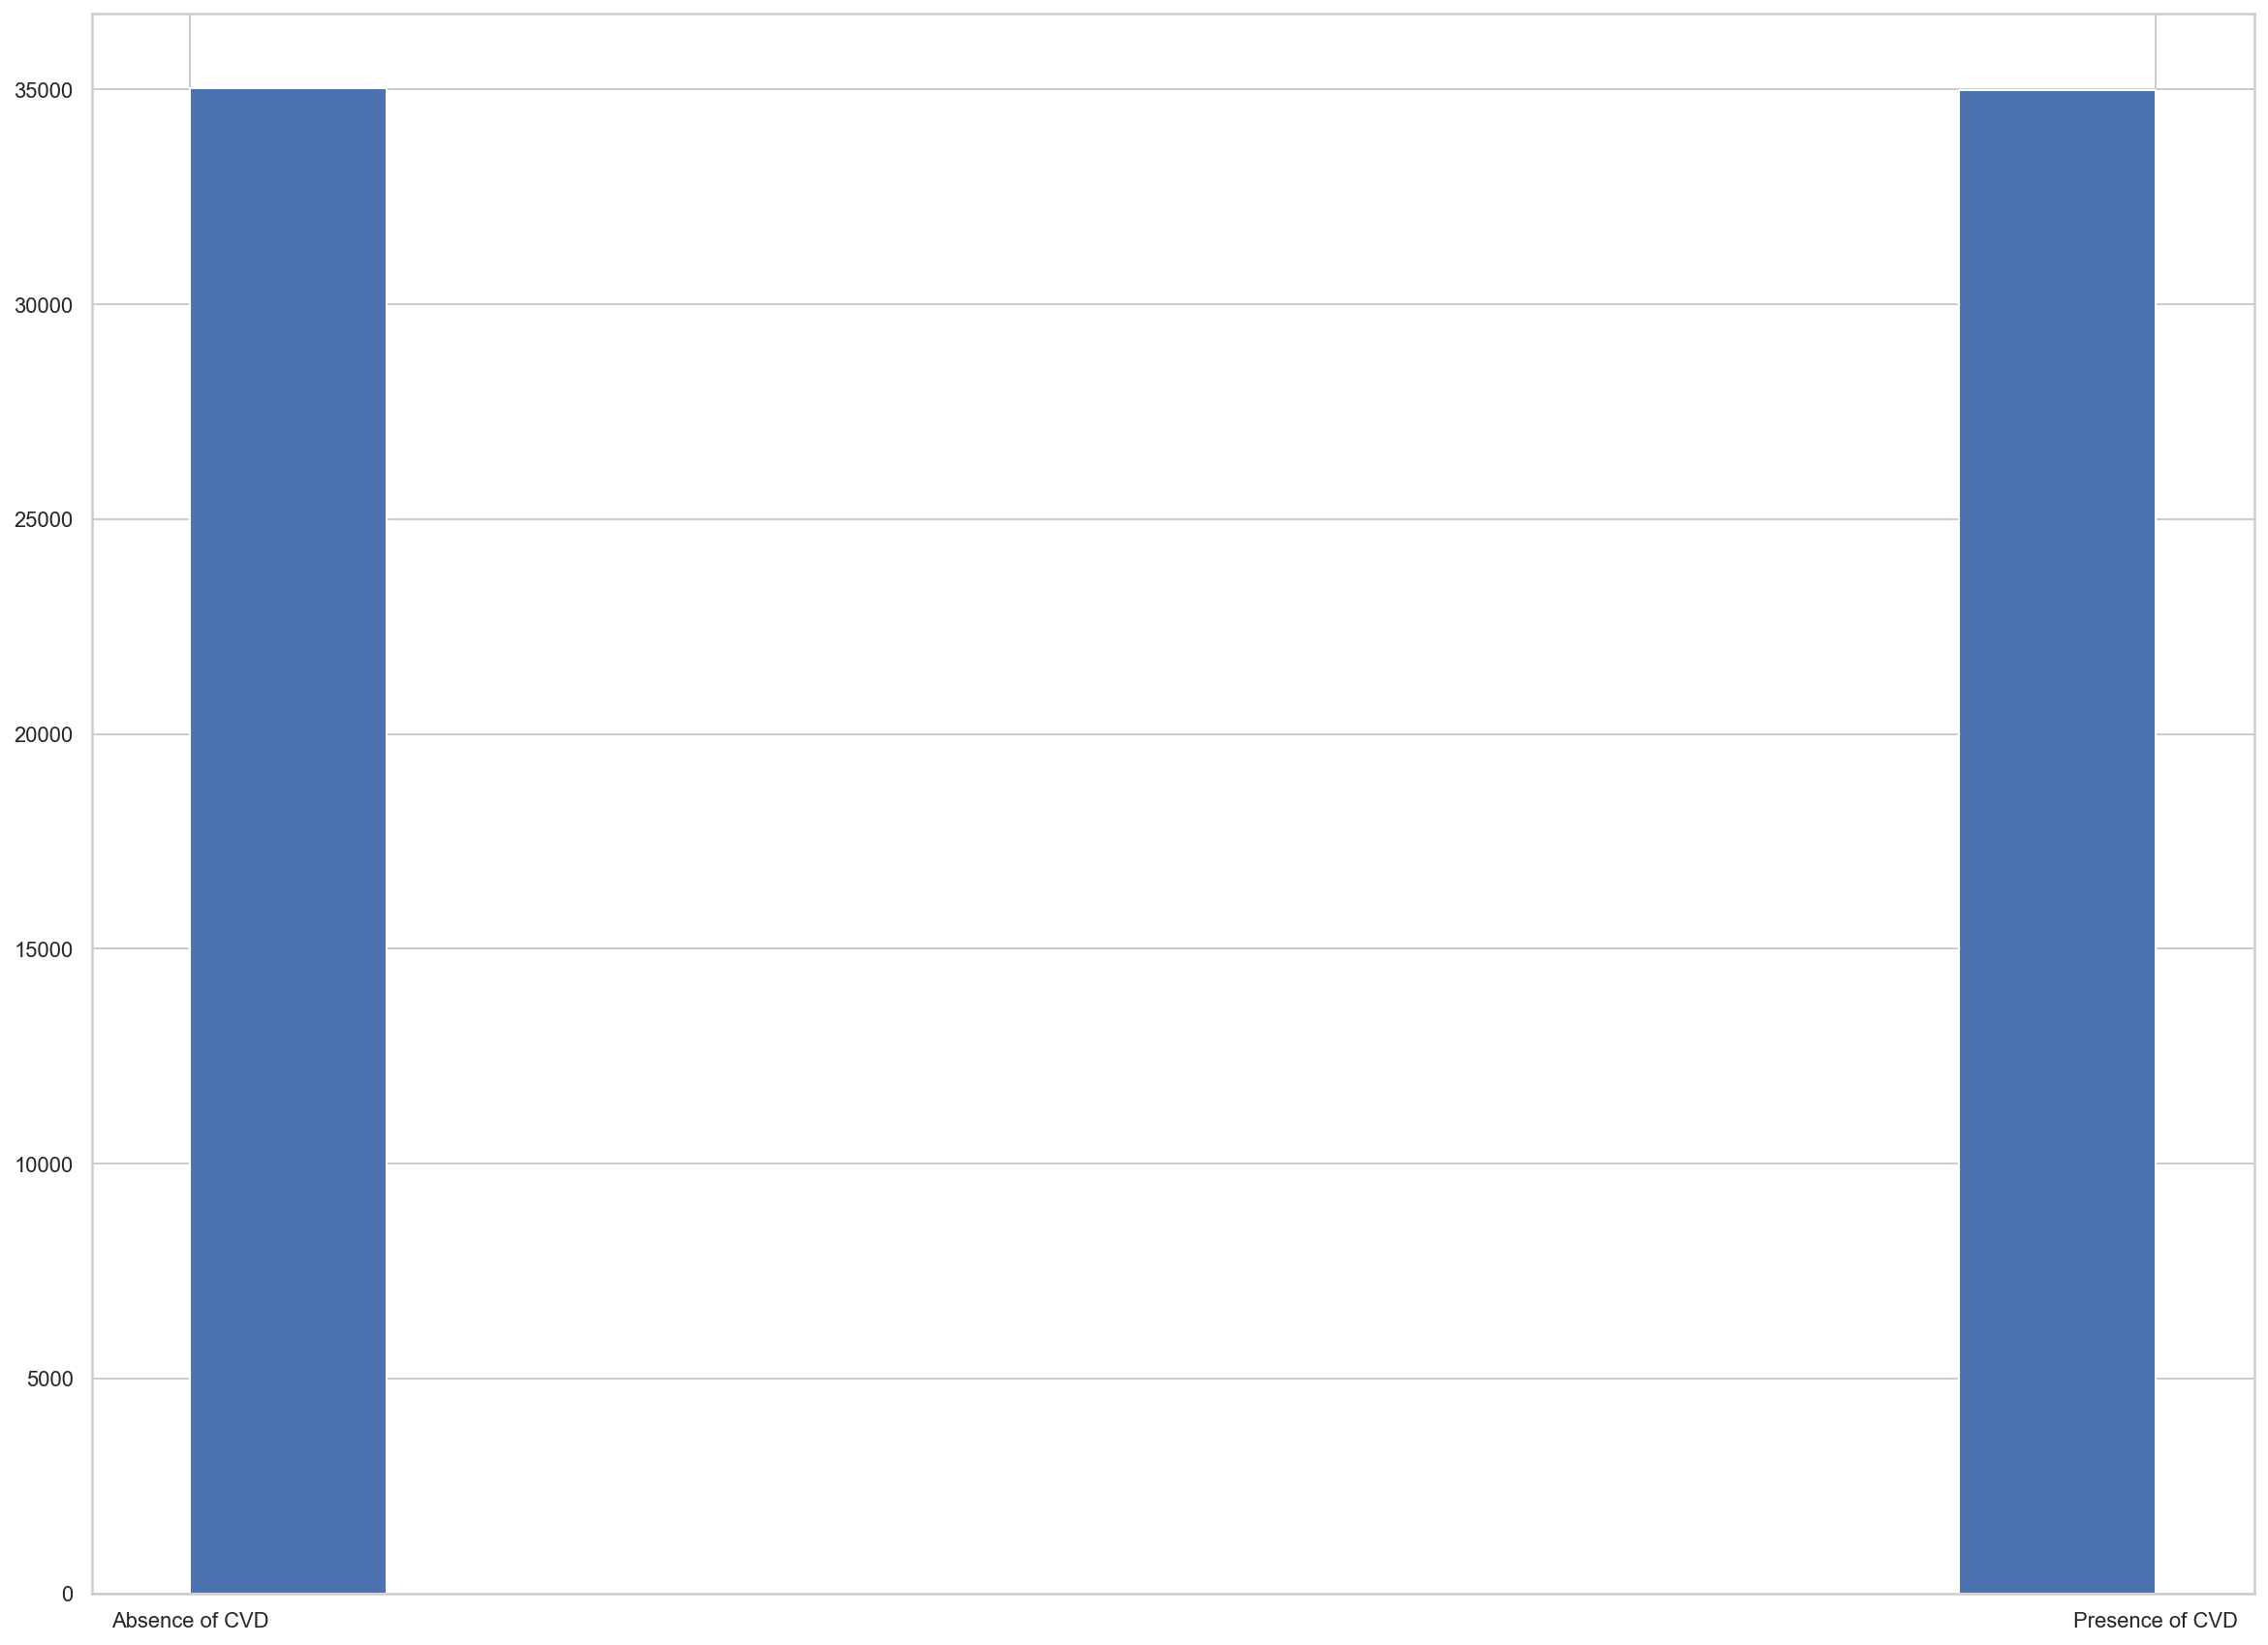

In [39]:
#Cardiovascular_Disease  histogram
plt.hist(df_cat["cardio"])
plt.show()

In [40]:
df_cat.groupby('sex')['sex'].count()

sex
female    45530
male      24470
Name: sex, dtype: int64

In [41]:
df_cardio = df.loc[df_cat['cardio']=="Presence of CVD"]
df_cardio.head()

,id,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active,cardio
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
7,12,61,2,178,95.0,130,90,3,3,0,0,1,1
15,24,45,2,172,112.0,120,80,1,1,0,0,0,1


In [42]:
df_cardio.groupby("cardio")["cardio"].count()

cardio
1    34979
Name: cardio, dtype: int64

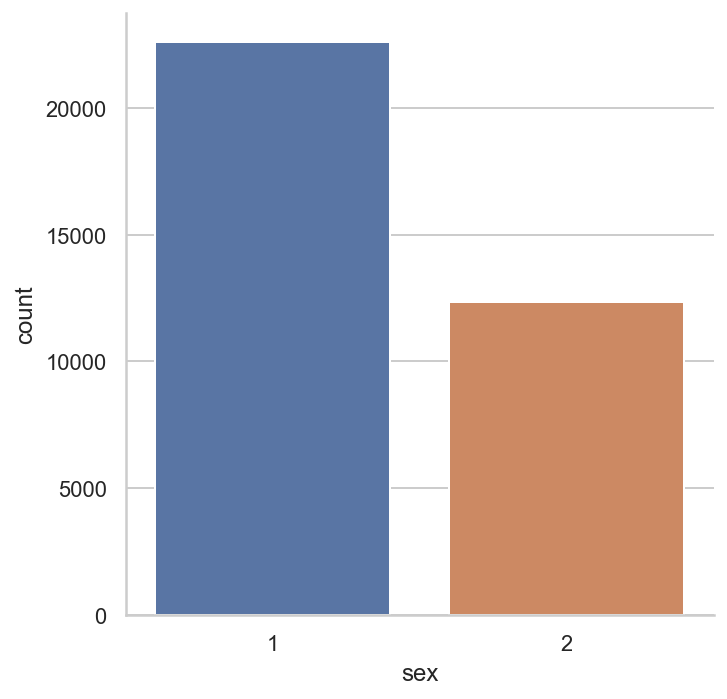

In [43]:
# Use seaborn to plot males and females count: female=1, male=2 who have caridovascular disease
sns.catplot('sex', data=df_cardio, kind='count', aspect=1.0)

Text(0.5, 1.0, "Distribution of Patients' Ages")

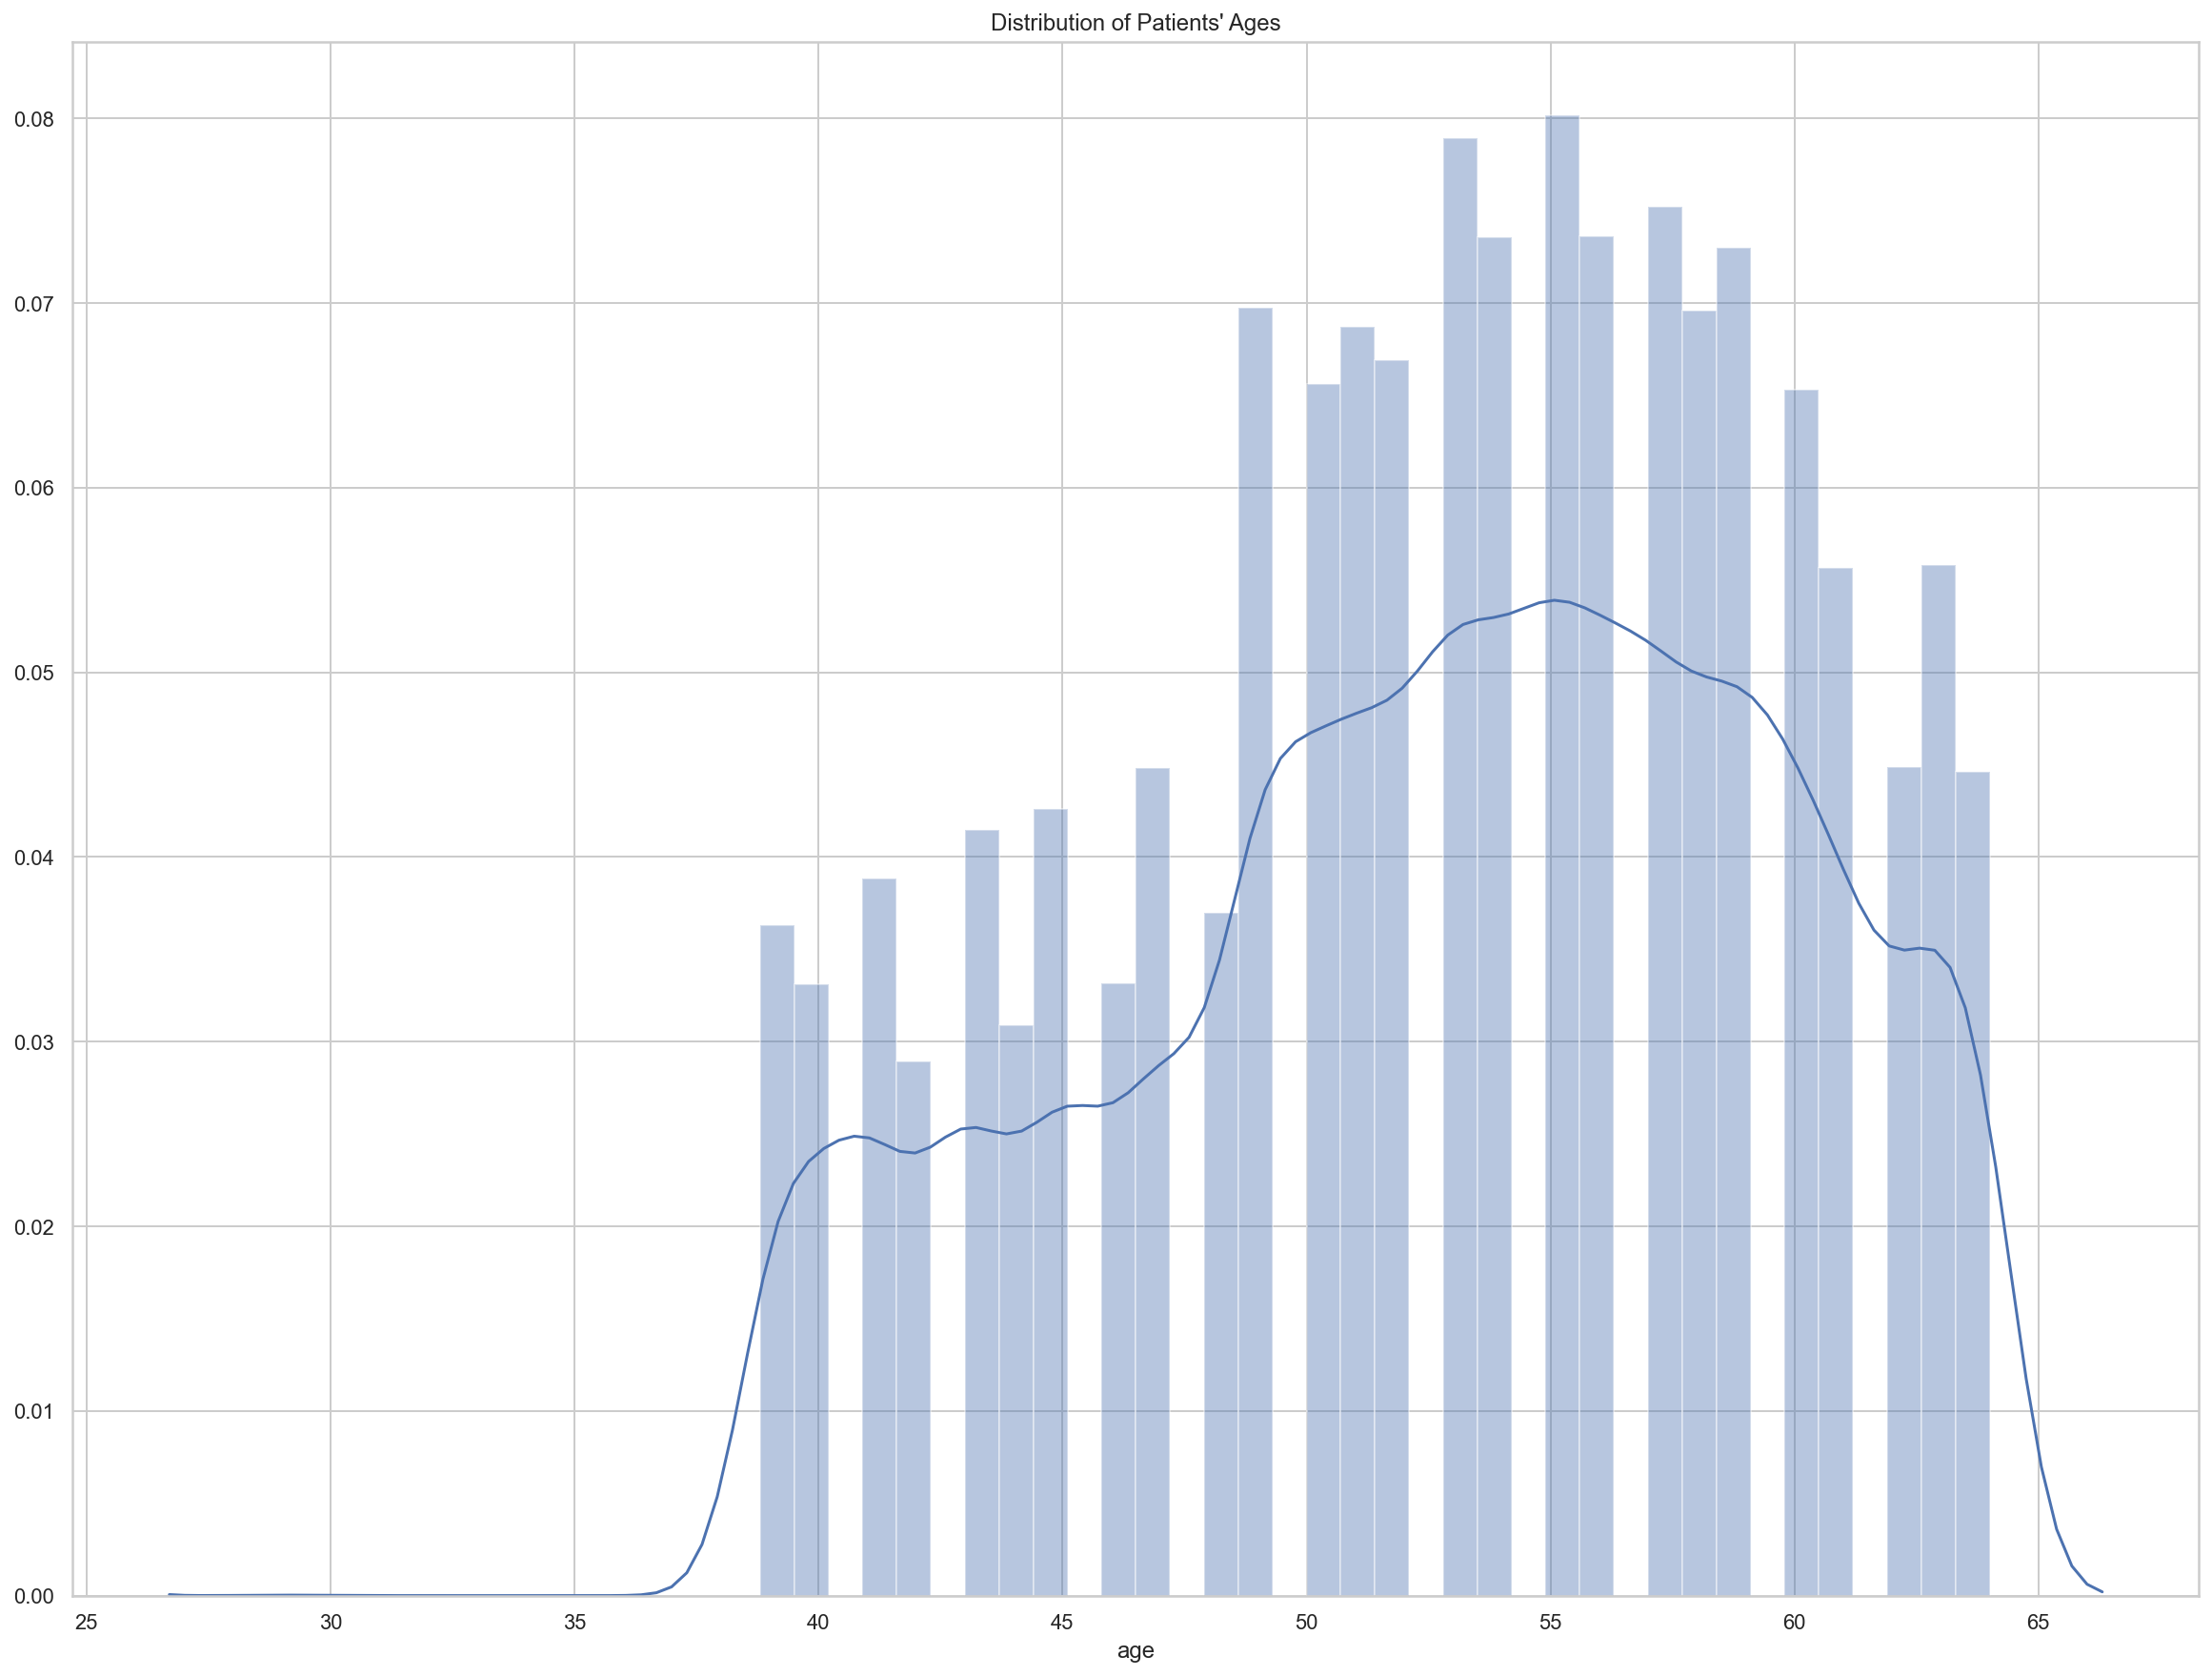

In [44]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(df_cat['age'])
age_dist.set_title("Distribution of Patients' Ages")

Text(0.5, 1.0, "Distribution of Patients' Ages")

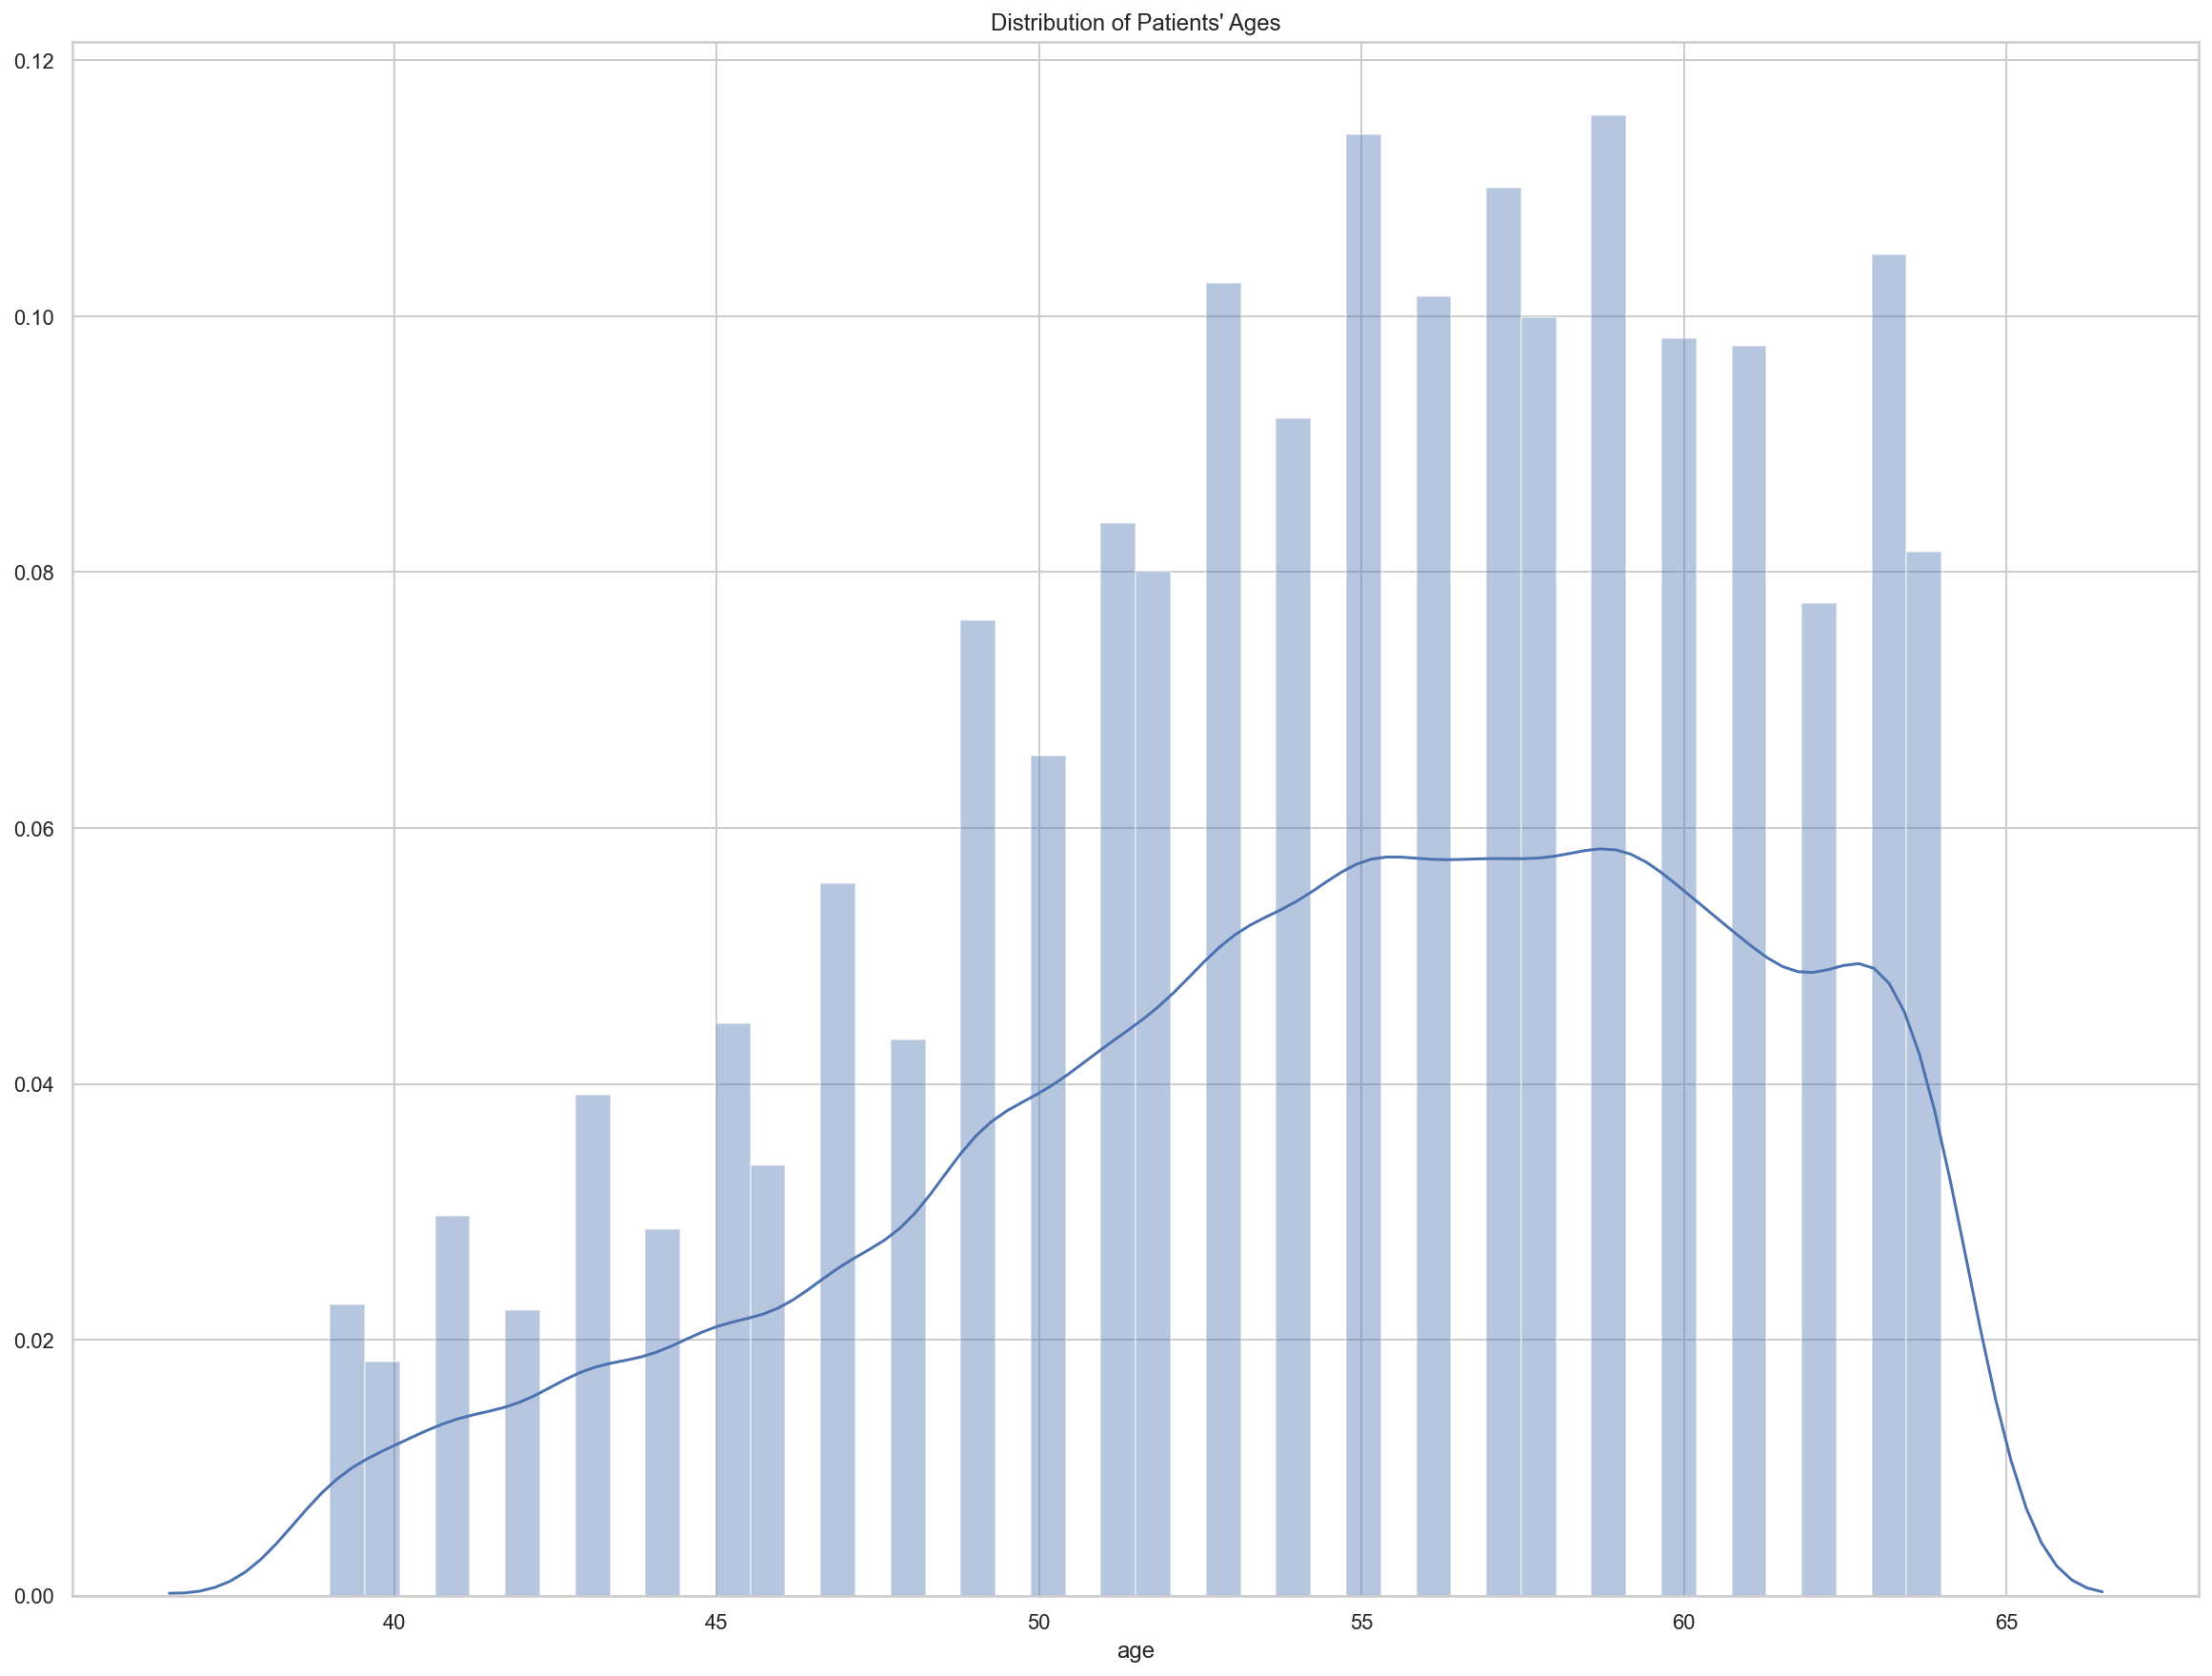

In [45]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(df_cardio['age'])
age_dist.set_title("Distribution of Patients' Ages")

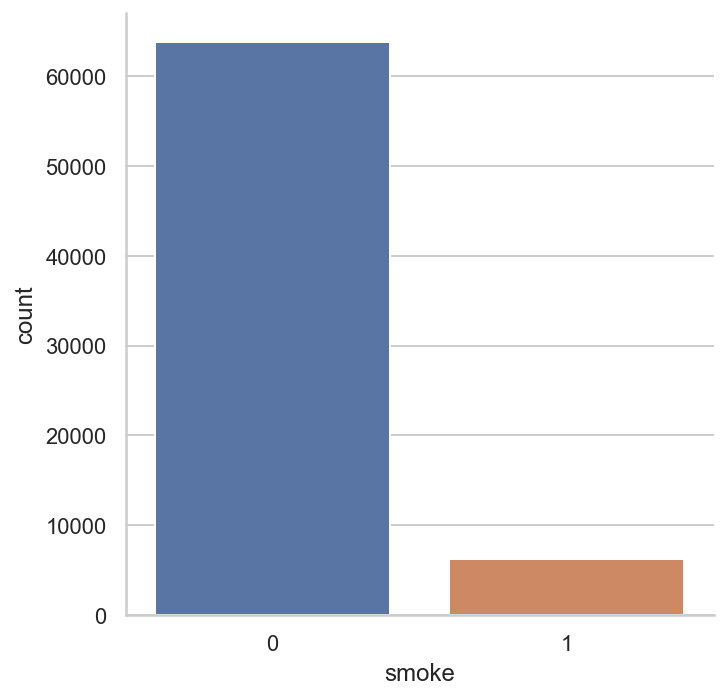

In [46]:
# Use seaborn to plot males and females count: female=1, male=2
sns.catplot('smoke', data=df_cat, kind='count', aspect=1.0)

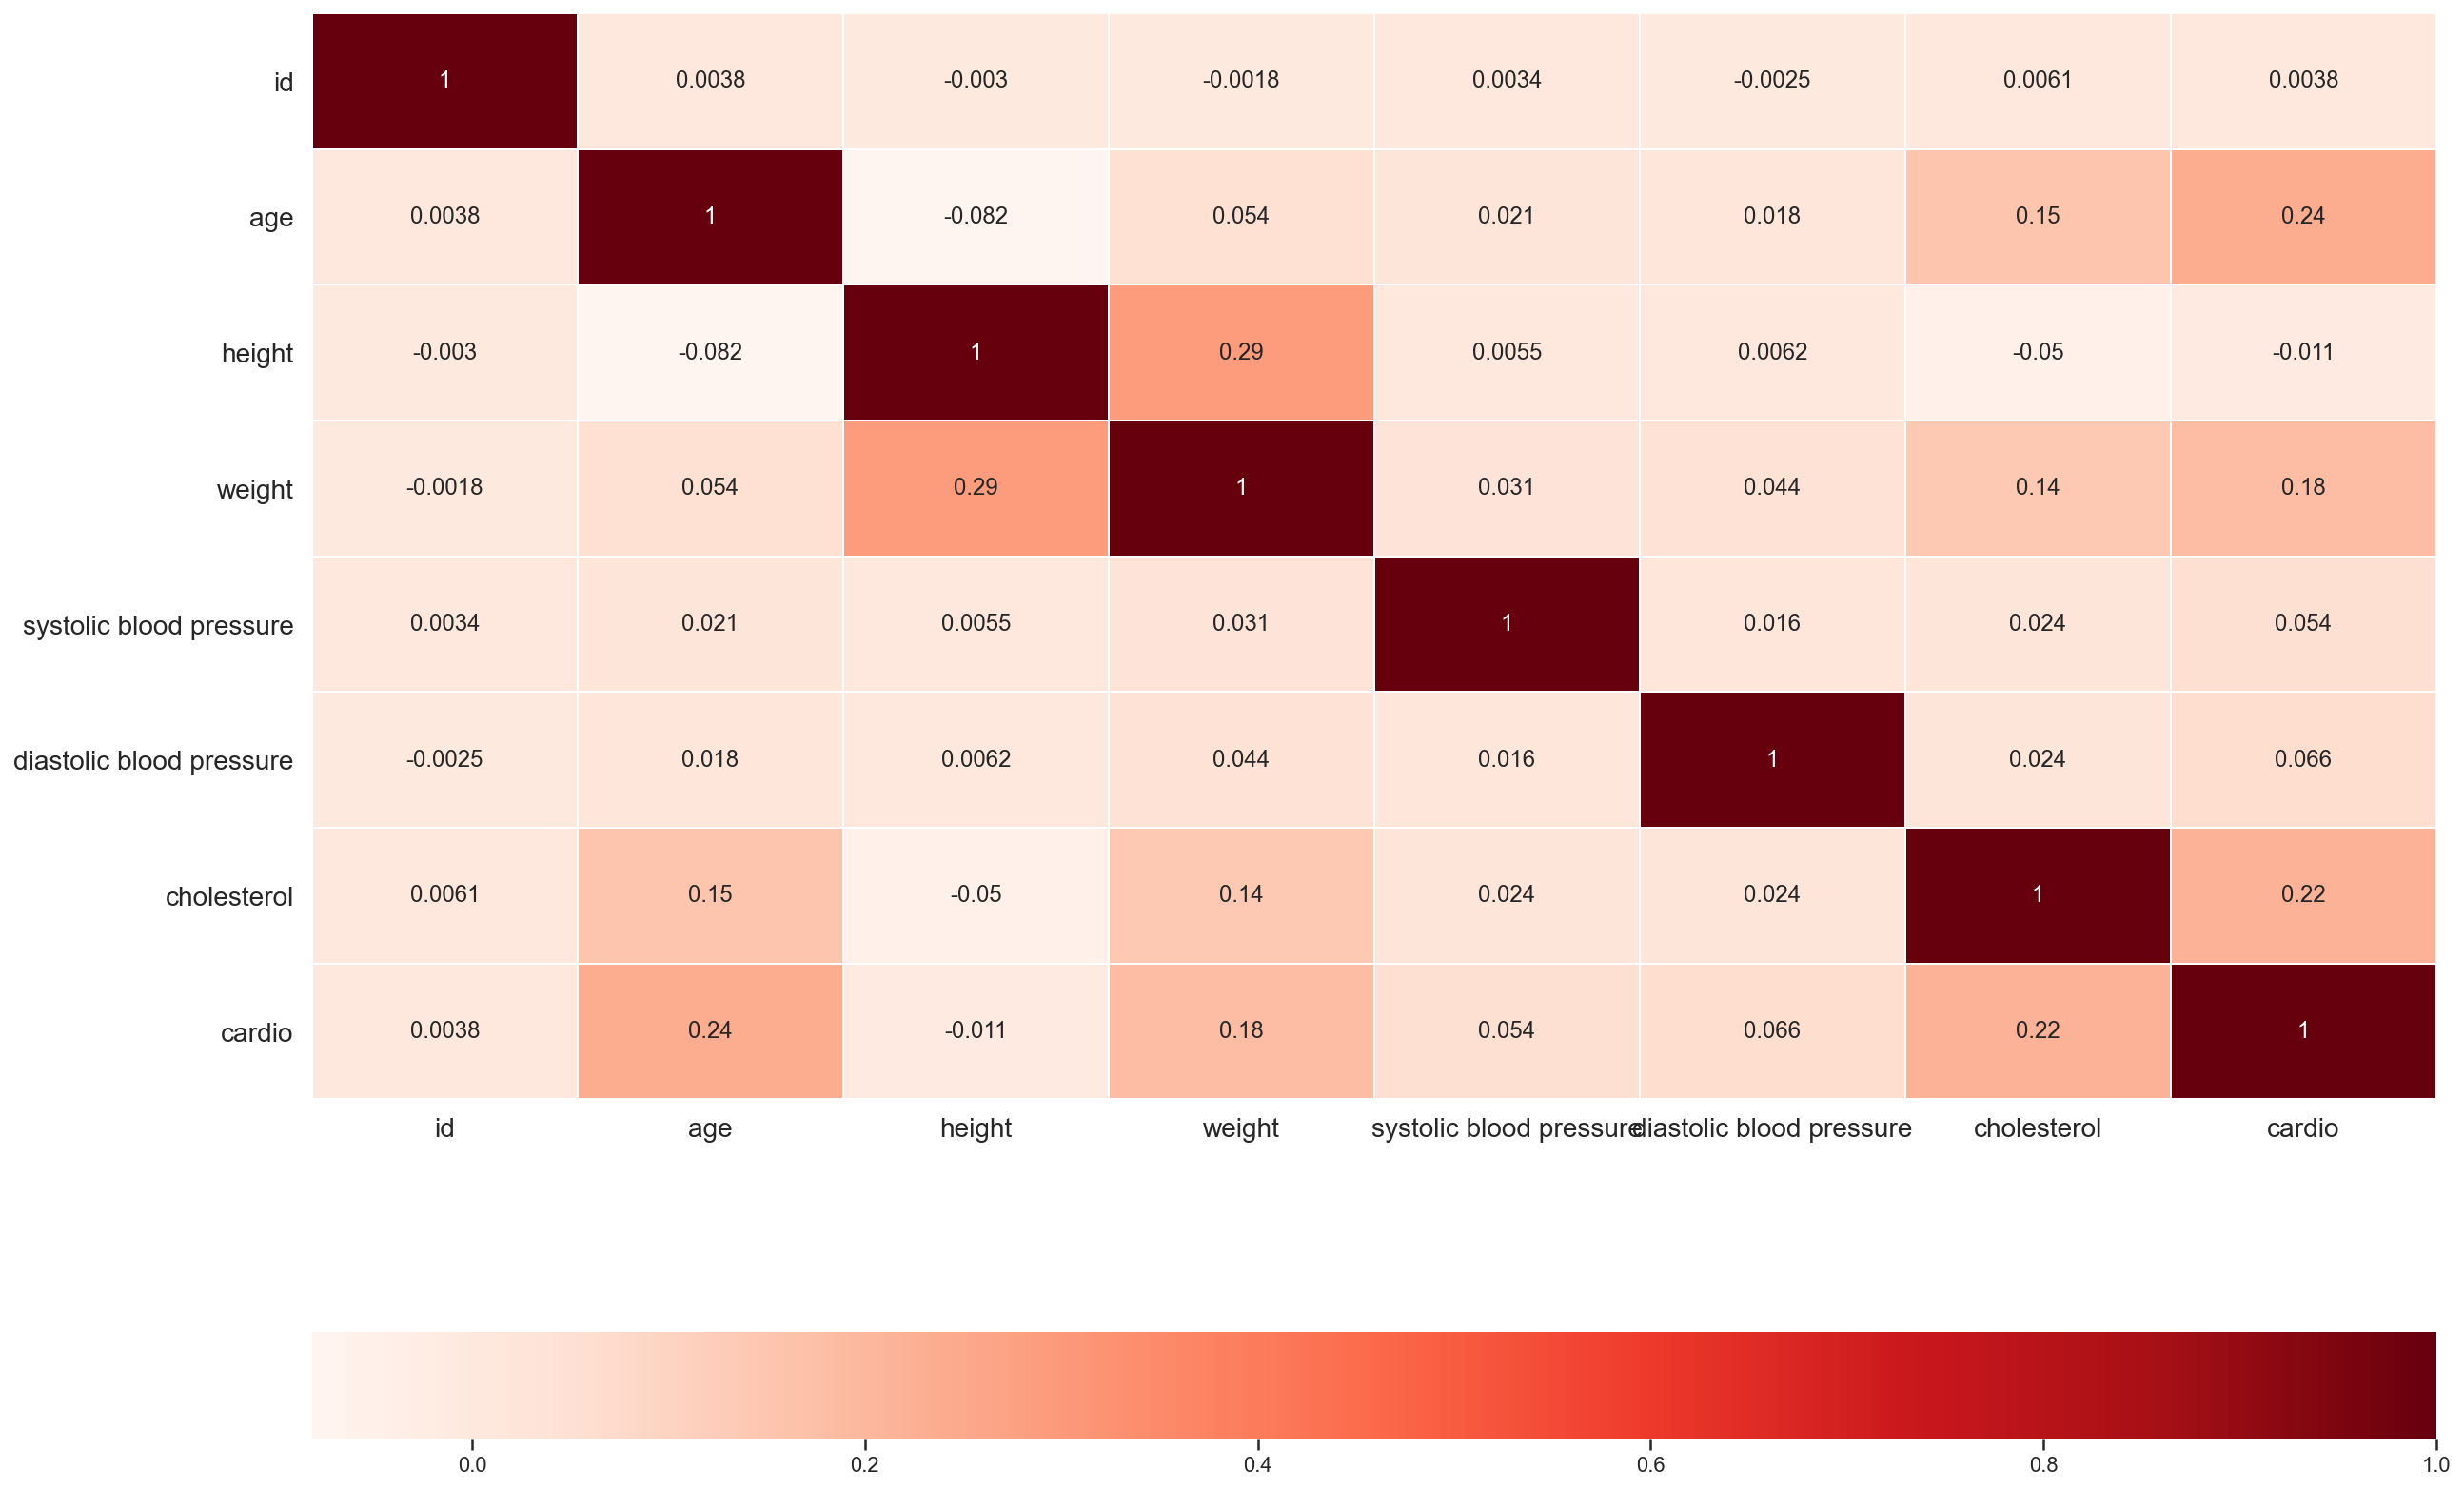

In [47]:
df_trim = df.drop(["sex", "gluc", "smoke", "alco", "active"], axis=1)
mpl.rcParams["figure.figsize"] = 20, 15
res = sns.heatmap(df_trim.corr(), annot = True, linewidth=.5, cmap="Reds",annot_kws={"size":12}, cbar_kws={"orientation": "horizontal"})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
if save_mode:
    plt.savefig(save_path + "Corr_Matrix_Selected.png")

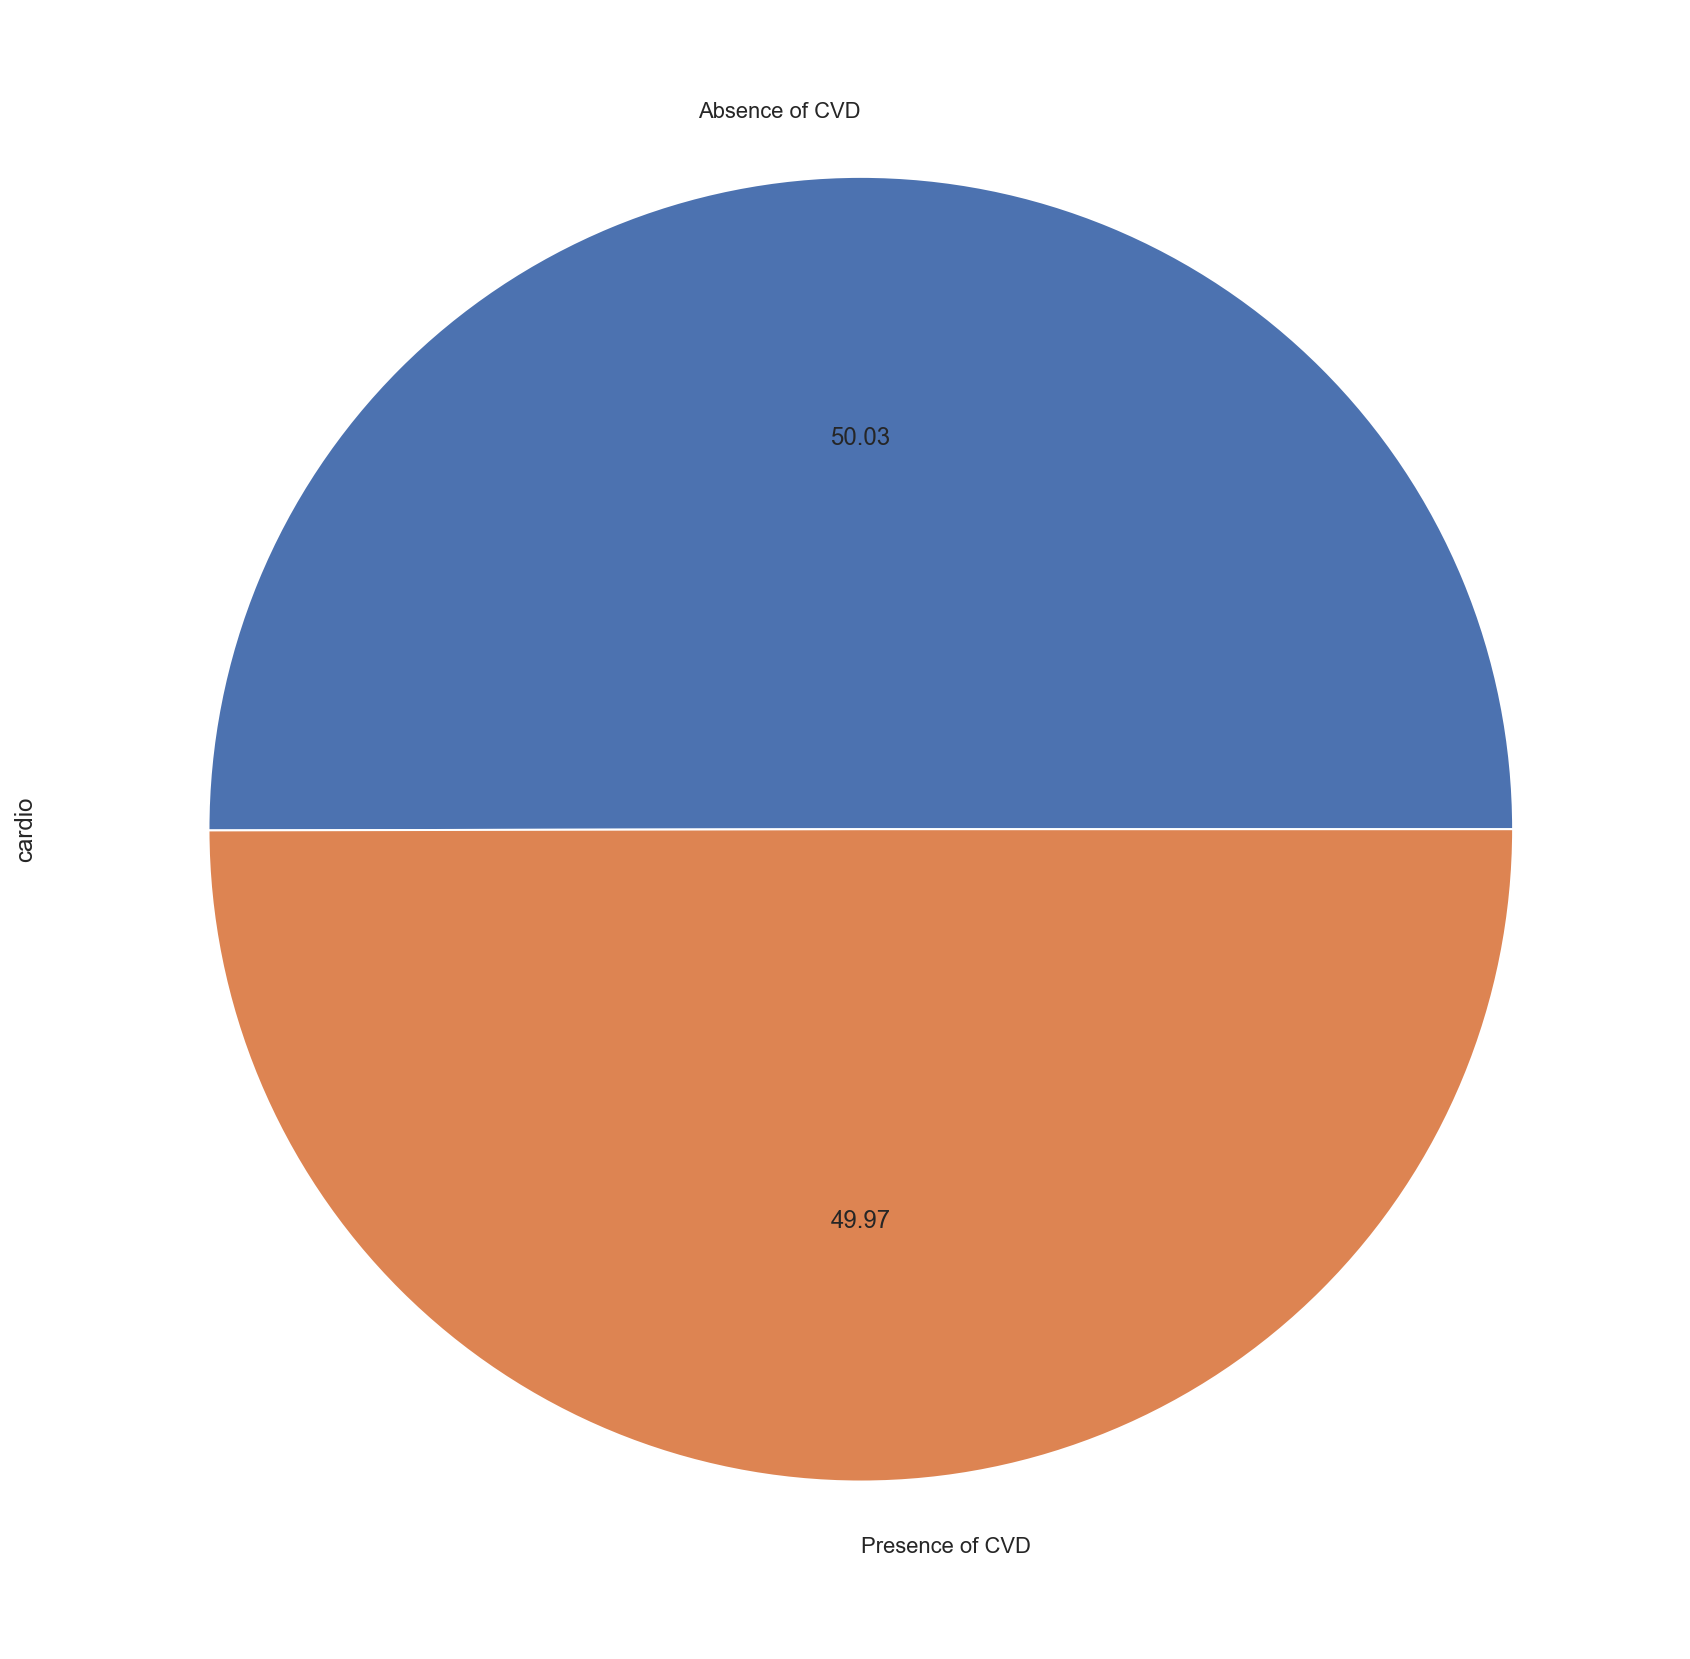

In [48]:
df_cat["cardio"].value_counts().plot(kind="pie",autopct="%.2f")
if save_mode:
    plt.savefig(save_path + "Cardio_Percent.png")

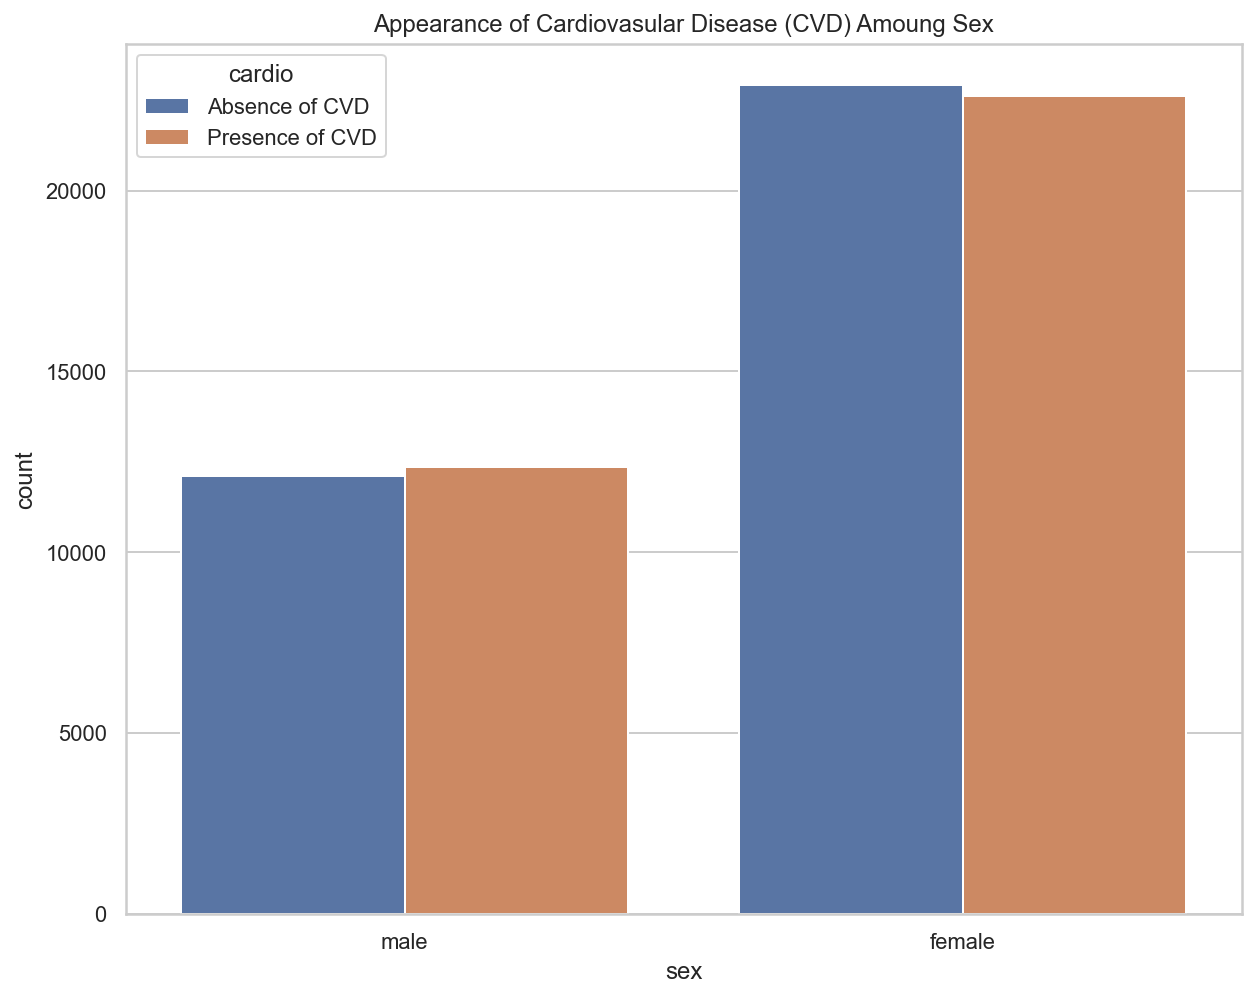

In [49]:
mpl.rcParams['figure.figsize'] = 10,8
sns.countplot(x="sex", data=df_cat, hue="cardio").set_title("Appearance of Cardiovasular Disease (CVD) Amoung Sex")
if save_mode:
    plt.savefig(save_path + "Count_Sex_CVD.png")
# Not much of a difference between females (1) and males (2) and the chance of getting cardiovascular disease.

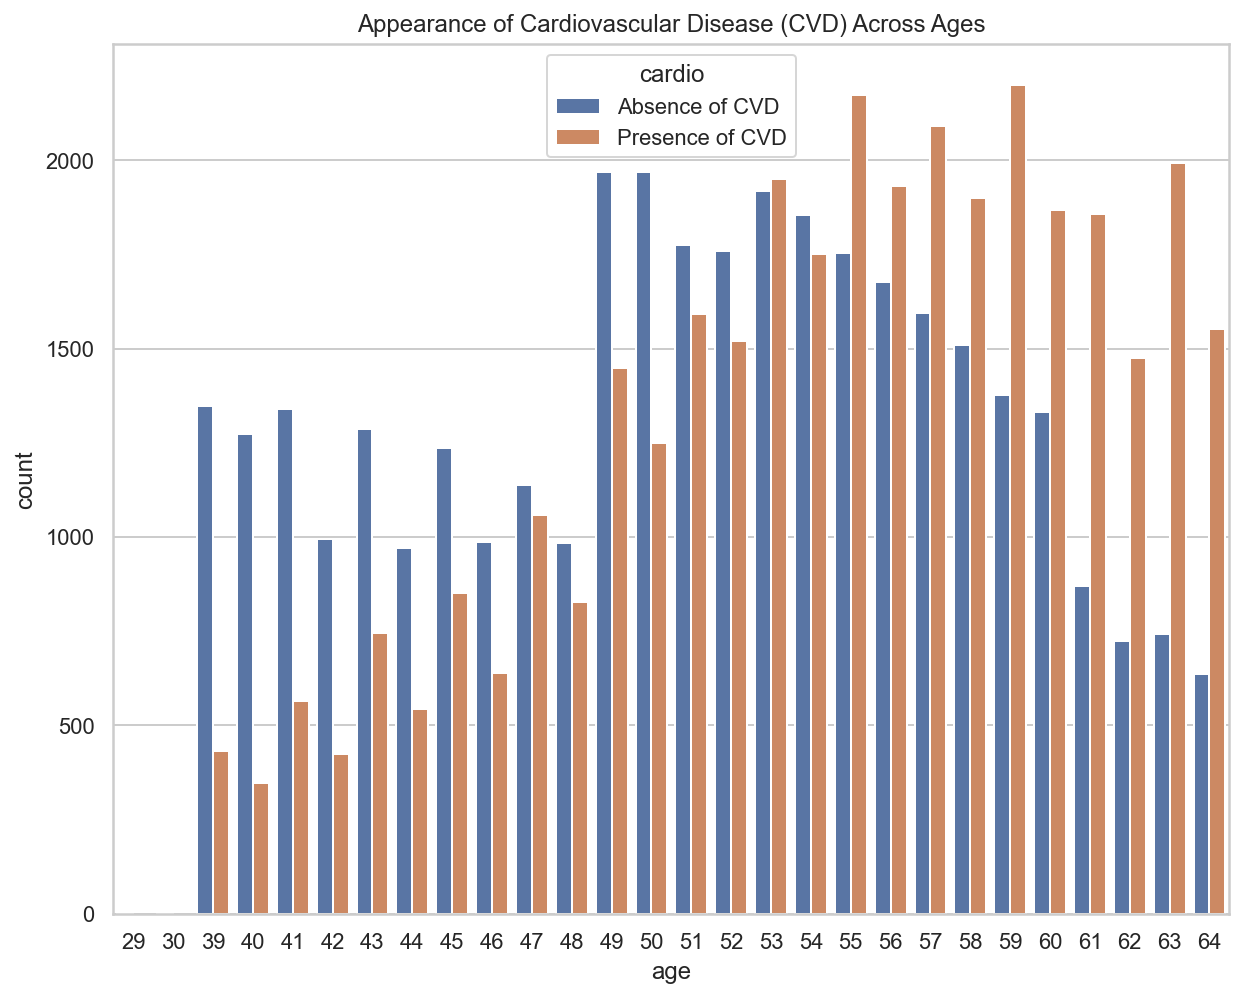

In [50]:
mpl.rcParams['figure.figsize'] = 10,8
sns.countplot(x="age", hue="cardio", data = df_cat).set_title("Appearance of Cardiovascular Disease (CVD) Across Ages")
if save_mode:
    plt.savefig(save_path + "Card_Across_Ages.png")

In [51]:
# calculate the BMI score 
df_cat["BMI"] = df_cat["weight"]/((df_cat["height"]/100)**2)
# categorize normal & abnormal
def bmi_cat(bmi_score):
    if bmi_score < 18.5:
        return "Underweight"
    elif 18.5 <= bmi_score <= 25:
        return "Normal"
    else:
        return "Abnormal"

df_cat["BMI_Categories"] = df_cat["BMI"].apply(lambda x: bmi_cat(x))
df_cat.head()

,id,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_Categories
0,0,50,male,168,62.0,110,80,Normal,1,0,0,1,Absence of CVD,21.967120,Normal
1,1,55,female,156,85.0,140,90,Well Above Normal,1,0,0,1,Presence of CVD,34.927679,Abnormal
2,2,51,female,165,64.0,130,70,Well Above Normal,1,0,0,0,Presence of CVD,23.507805,Normal
3,3,48,male,169,82.0,150,100,Normal,1,0,0,1,Presence of CVD,28.710479,Abnormal
4,4,47,female,156,56.0,100,60,Normal,1,0,0,0,Absence of CVD,23.011177,Normal


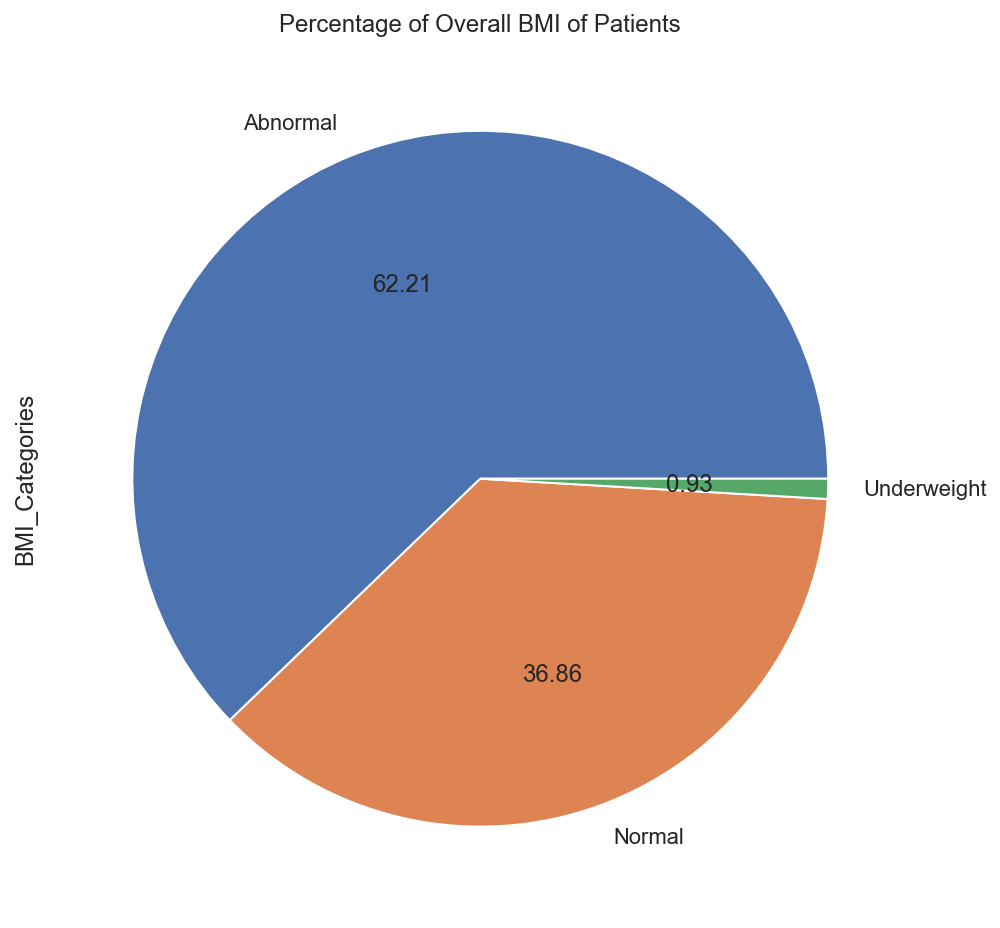

In [52]:
df_cat["BMI_Categories"].value_counts().plot(kind="pie", title="Percentage of Overall BMI of Patients", autopct="%.2f")
if save_mode:
    plt.savefig(save_path + "BMI.png")

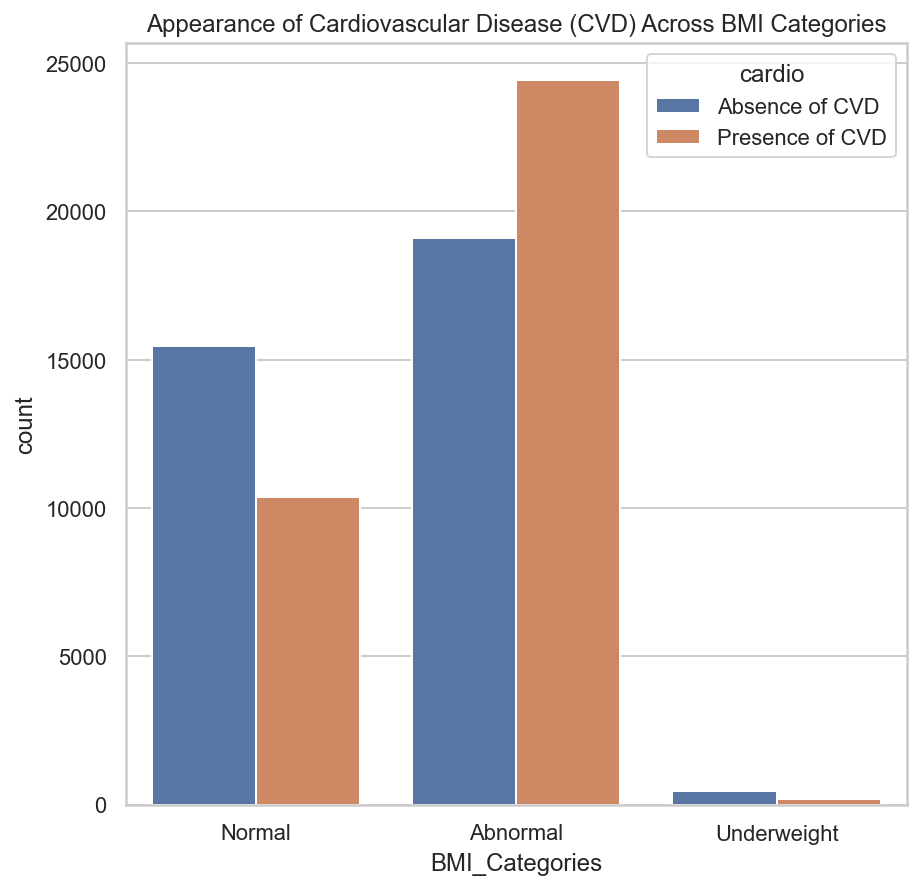

In [53]:
mpl.rcParams['figure.figsize'] = 7, 7
sns.countplot(x="BMI_Categories", hue="cardio", data = df_cat).set_title("Appearance of Cardiovascular Disease (CVD) Across BMI Categories")
if save_mode:
    plt.savefig(save_path + "BMI_Cardio.png")

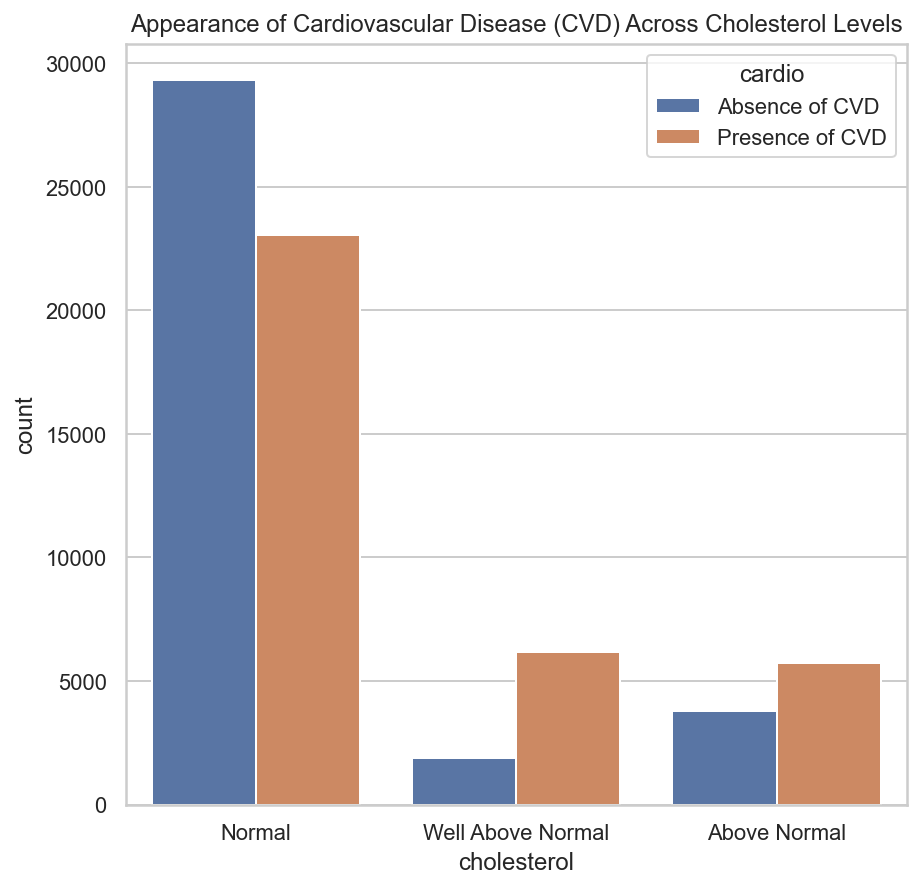

In [54]:
# Cholesterol Analysis
mpl.rcParams['figure.figsize'] = 7, 7
sns.countplot(x="cholesterol", hue="cardio", data = df_cat).set_title("Appearance of Cardiovascular Disease (CVD) Across Cholesterol Levels")
if save_mode:
    plt.savefig(save_path + "Choles_Cardio.png")

In [55]:
# Remove outliers
outliers = ((df_cat["systolic blood pressure"] > 250) | (df_cat["systolic blood pressure"] > 250) | (df_cat["diastolic blood pressure"] > 200) )
df_cat = df_cat[~outliers]
print("There is {} outlier".format(df_cat[outliers]["cardio"].count()))

There is 0 outlier


/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [56]:
df_cat = df_cat[~outliers]

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [57]:
# According to
# https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers#1
def cat_blood_pressure(row):
    high = row["systolic blood pressure"]
    low = row["diastolic blood pressure"]
    if (high < 120) and (low < 80):
        return "Normal"
    elif 120 <= high <= 129 and low < 80:
        return "Elevated"
    elif 130 <= high <= 139 or 80 <= low <= 89:
        return "Hyertension (Stage 1)"
    elif  140 <= high <= 180 or 90 <= low <= 120:
        return "Hypertension (Stage 2)"
    else:
        return "Hypertensive Crisis"

In [58]:
df_cat["blood_category"] = df_cat.apply(cat_blood_pressure, axis=1)
df_cat.head()

,id,age,sex,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_Categories,blood_category
0,0,50,male,168,62.0,110,80,Normal,1,0,0,1,Absence of CVD,21.967120,Normal,Hyertension (Stage 1)
1,1,55,female,156,85.0,140,90,Well Above Normal,1,0,0,1,Presence of CVD,34.927679,Abnormal,Hypertension (Stage 2)
2,2,51,female,165,64.0,130,70,Well Above Normal,1,0,0,0,Presence of CVD,23.507805,Normal,Hyertension (Stage 1)
3,3,48,male,169,82.0,150,100,Normal,1,0,0,1,Presence of CVD,28.710479,Abnormal,Hypertension (Stage 2)
4,4,47,female,156,56.0,100,60,Normal,1,0,0,0,Absence of CVD,23.011177,Normal,Normal


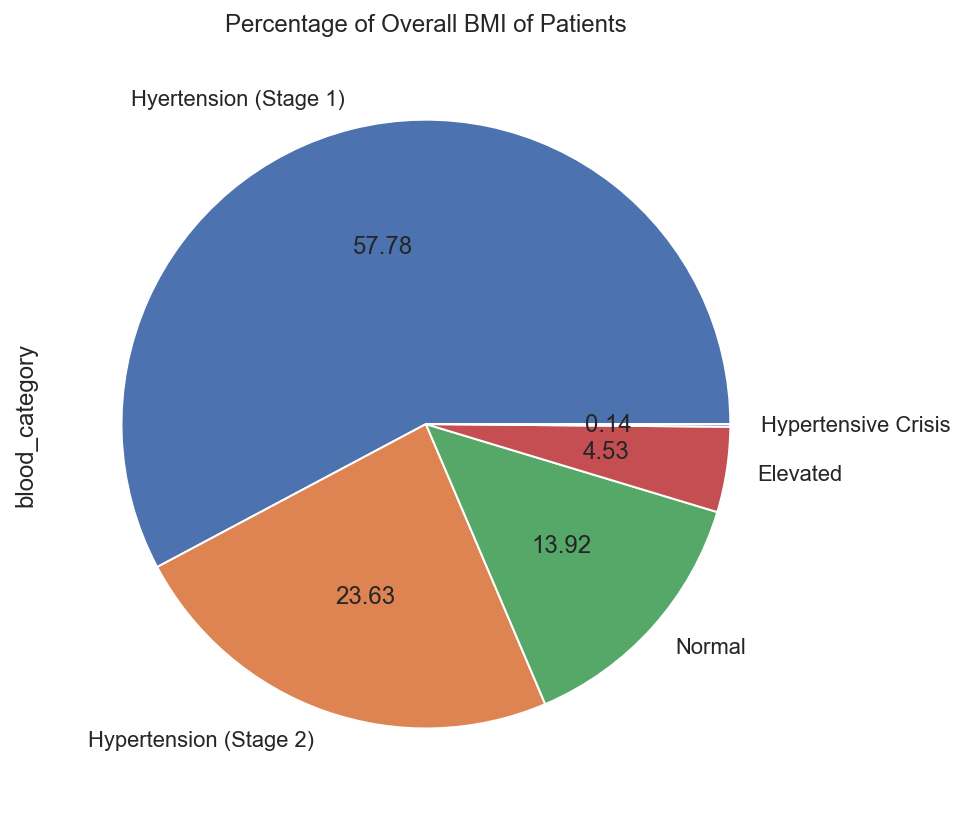

In [59]:
df_cat["blood_category"].value_counts().plot(kind="pie", title="Percentage of Overall BMI of Patients", autopct="%.2f")
if save_mode:
    plt.savefig(save_path + "Blood_Pie_Cardio.png")

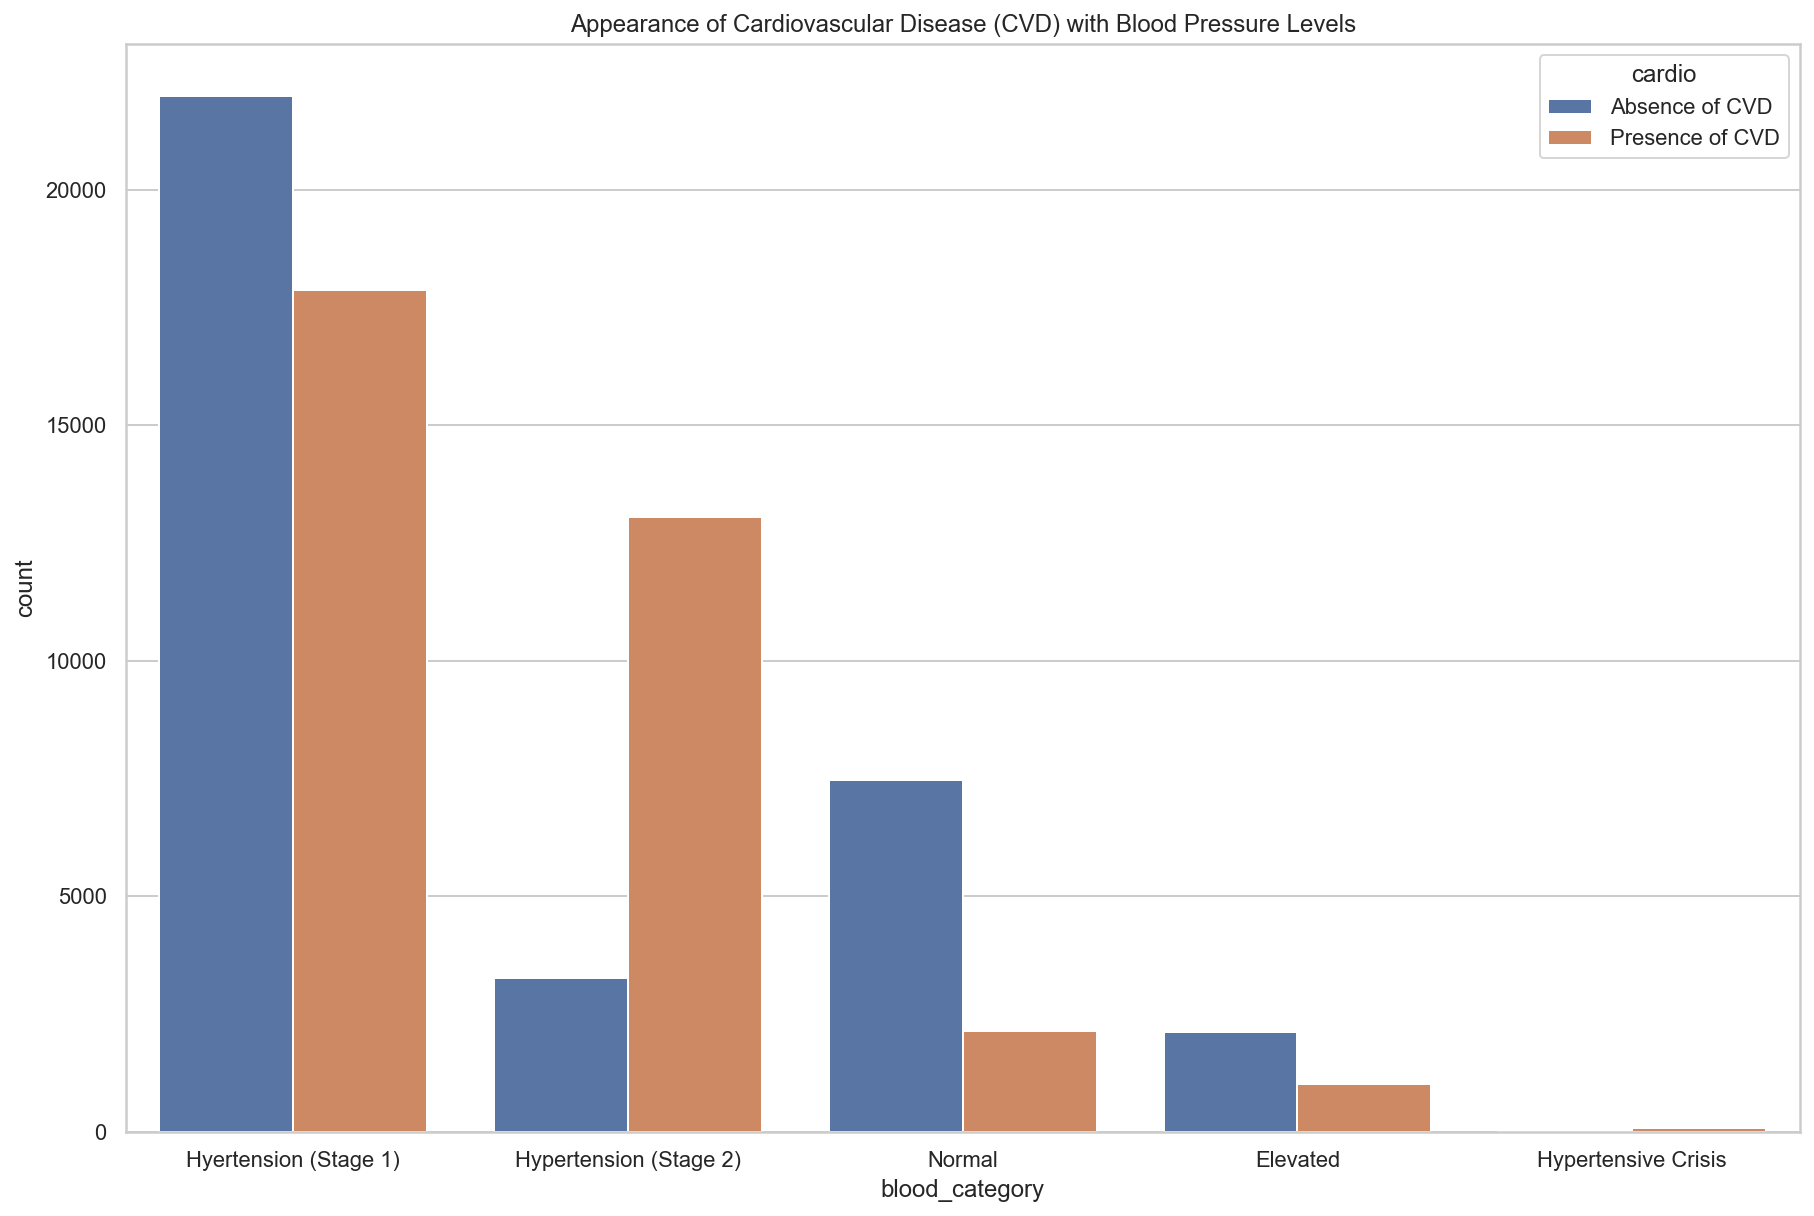

In [105]:
mpl.rcParams['figure.figsize'] = 15, 10
sns.countplot(x="blood_category",hue="cardio", data = df_cat).set_title("Appearance of Cardiovascular Disease (CVD) with Blood Pressure Levels")
if save_mode:
    plt.savefig(save_path + "Blood_Cardio.png")

# Random Forest Model

In [61]:
# Train a Decision Tree Model
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=5)
rf_model = rf.fit(X_train_scaled, y_train)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [62]:
print("Accuracy (training): {0:.3f}".format(
        rf.score(
            X_train_scaled,
            y_train)))
print("Accuracy (validation): {0:.3f}".format(
        rf.score(
            X_test_scaled,
            y_test)))

Accuracy (training): 0.731
Accuracy (validation): 0.731


In [63]:
# Evaluate the model
y_pred = rf.predict_proba(X_test_scaled)
y_pred[:,1][0]

0.1849076181409509

In [64]:
from sklearn.model_selection import cross_val_score
rf_cv = RandomForestClassifier(n_estimators=100,
                               max_depth=5)
scores = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5)

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-pack

In [65]:
scores

array([0.72611222, 0.72011051, 0.72789634, 0.73742378, 0.73275534])

In [66]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.01)


In [67]:
fn=X.columns.tolist()
cn=y.columns.tolist()

In [68]:
fn

['age',
 'height',
 'weight',
 'systolic blood pressure',
 'diastolic blood pressure',
 'cholesterol']

In [69]:
cn

['cardio']

In [70]:
print(len(rf.estimators_))

100


In [71]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=2114436378)

In [72]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
#tree.plot_tree(rf.estimators_[0],
#                feature_names = fn, 
#                class_names = cn,
#                filled = True);
# fig.savefig('rf_individualtree.png')

In [73]:
import pickle
from pickle import dump
# save the model
dump(rf, open('model.pkl', 'wb'))

In [74]:
# save the scaler
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

## Logistic Regression

In [108]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.726


## GradientBoostingClassifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.01,0.05, 0.1]
for learning_rate in learning_rates:
    GB = GradientBoostingClassifier(n_estimators=80,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=8,
                                            random_state=42)

    # Fit the model
    GB.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy (training): {0:.3f}".format(
        GB.score(
            X_train_scaled,
            y_train)))
    print("Accuracy (validation): {0:.3f}".format(
        GB.score(
            X_test_scaled,
            y_test)))
    print()

/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.01
Accuracy (training): 0.747
Accuracy (validation): 0.734



/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.05
Accuracy (training): 0.759
Accuracy (validation): 0.732



/Users/sdang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Learning rate:  0.1
Accuracy (training): 0.766
Accuracy (validation): 0.732



In [77]:
X_test

,age,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol
6101,39,180,74.0,110,70,1
12258,62,156,58.0,120,80,1
38998,43,171,61.0,160,90,2
11965,56,155,97.0,140,90,3
20893,50,172,93.0,120,80,2
...,...,...,...,...,...,...
47830,53,176,97.0,160,100,2
50919,46,171,89.0,120,80,1
39531,63,157,97.0,180,90,3
23755,47,153,70.0,110,70,1


In [78]:
X_test_row = X_test[0:1]

In [79]:
X_test_row

,age,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol
6101,39,180,74.0,110,70,1


In [80]:
GB.predict_proba(X_test_row)

array([[0.08188906, 0.91811094]])

## K-Nearest Neighbor

In [81]:
# Import data set as df
df = pd.read_csv("cardio.csv",sep=';')

In [82]:
# Set the features columns
df_feature = df[["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"]]
# Set the target column
df_target = df["cardio"]

In [83]:
scaler = StandardScaler()
scaler.fit(df_feature)

StandardScaler()

In [84]:
scaled_features = scaler.transform(df_feature)

In [85]:
df_feat = pd.DataFrame(scaled_features,columns=["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"])
df_feat.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607


In [86]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_target,test_size=0.30)

In [87]:
scoring = {'accuracy' : make_scorer(accuracy_score)}

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=27)
knn_scores = cross_validate(knn_model, df_feature, df_target, cv=5,
                        scoring=scoring, return_train_score=False)

In [89]:
# K value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

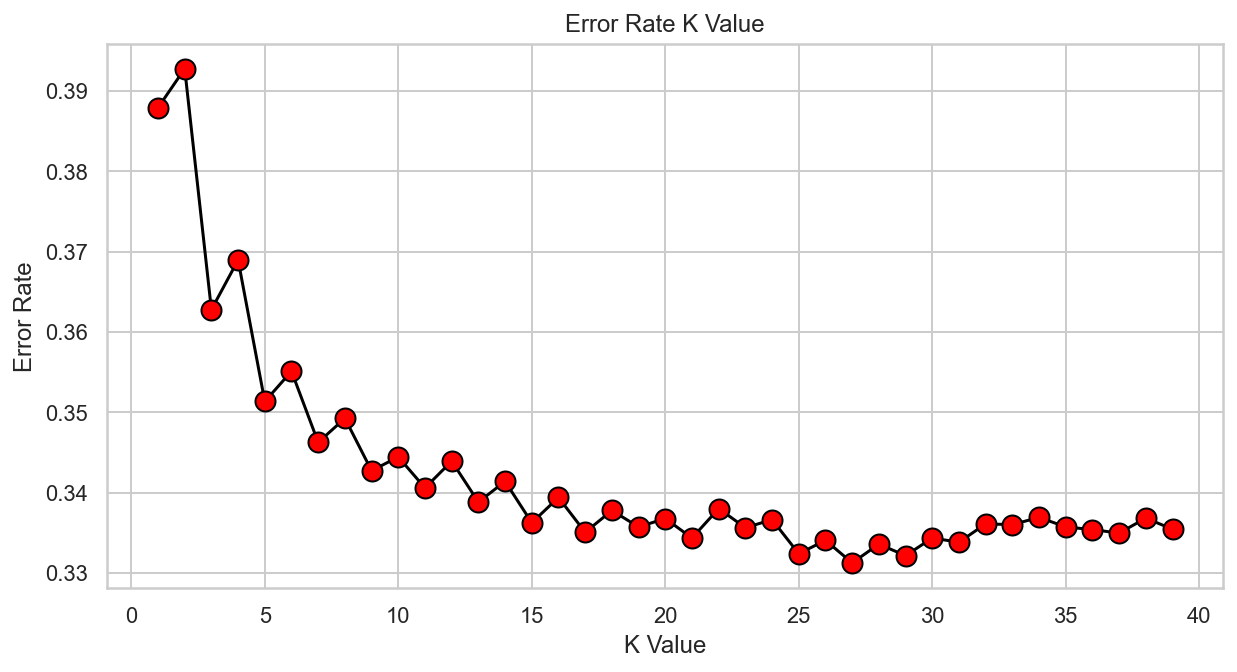

In [90]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='black', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [91]:
print("Accuracy test score: {:.3}".format(knn_scores['test_accuracy'].mean()))

Accuracy test score: 0.71
